<FONT SIZE=7><B>SEPHORA MARKETING ANALYTICS -2024</B></FONT><br>
                                        Anju George

In [1]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Load the Excel data into a Pandas DataFrame
from google.colab import drive

drive.mount('/content/drive')
df0=pd.read_csv('/content/drive/MyDrive/Sephora/product_info.csv')
df1=pd.read_csv('/content/drive/MyDrive/Sephora/reviews_0-250.csv')
df2=pd.read_csv('/content/drive/MyDrive/Sephora/reviews_250-500.csv')
df3=pd.read_csv('/content/drive/MyDrive/Sephora/reviews_500-750.csv')
df4=pd.read_csv('/content/drive/MyDrive/Sephora/reviews_750-1250.csv')
df5=pd.read_csv('/content/drive/MyDrive/Sephora/reviews_1250-end.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font size=5><b>Merge All Dataframes</b>

Concatenates multiple review DataFrames into merged_df and merges it with the product information DataFrame df0 on product_id using an outer join. This creates sephora_reviews, combining all product details and reviews while retaining unmatched entries.

In [2]:
# Combine all review DataFrames into a single DataFrame
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [3]:
merged_df.columns # Check the column names

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [4]:
df0.columns  # Check the column names of the product information DataFrame

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [5]:
# Merge product info with reviews
sephora_reviews= pd.merge(df0, merged_df, on='product_id', how='outer')

In [6]:
# Display the first 5 rows of the DataFrame
sephora_reviews.head(5)

product_id                      product_name_x  brand_id  \
0  P01018539       Master Mattes Liquid Eyeliner      6332   
1  P02318798  Master Metallics Eyeshadow Palette      6332   
2  P04141879       Liquid Touch Foundation Brush      6317   
3  P04456664               Master Eye Prep & Set      6332   
4  P04546871            Body Lava Body Luminizer      6200   

                  brand_name_x  loves_count  rating_x  reviews  \
0              MAKEUP BY MARIO        13625    3.8428    159.0   
1              MAKEUP BY MARIO        25738    3.4063     96.0   
2  Rare Beauty by Selena Gomez        98192    4.5796    490.0   
3              MAKEUP BY MARIO        29675    3.5946    111.0   
4      Fenty Beauty by Rihanna       161689    3.8327    819.0   

                size variation_type    variation_value  ... submission_time  \
0    0.04 oz/ 1.2 mL           Size    0.04 oz/ 1.2 mL  ...             NaN   
1  12 x 0.03 oz/ 1 g           Size  12 x 0.03 oz/ 1 g  ...             NaN   
2                NaN            NaN                NaN  ...             NaN   
3                NaN          Color             Medium  ...             NaN   
4        3 oz/ 90 mL          Color       Cognac Candy  ...             NaN   

  review_text  review_title  skin_tone  eye_color  skin_type  hair_color  \
0         NaN           NaN        NaN        NaN        NaN         NaN   
1         NaN           NaN        NaN        NaN        NaN         NaN   
2         NaN           NaN        NaN        NaN        NaN         NaN   
3         NaN           NaN        NaN        NaN        NaN         NaN   
4         NaN           NaN        NaN        NaN        NaN         NaN   

   product_name_y  brand_name_y  price_usd_y  
0             NaN           NaN          NaN  
1             NaN           NaN          NaN  
2             NaN           NaN          NaN  
3             NaN           NaN          NaN  
4             NaN           NaN          NaN  

[5 rows x 45 columns]

In [7]:
# Display summary information about the DataFrame
sephora_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100554 entries, 0 to 1100553
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   product_id                1100554 non-null  object 
 1   product_name_x            1100554 non-null  object 
 2   brand_id                  1100554 non-null  int64  
 3   brand_name_x              1100554 non-null  object 
 4   loves_count               1100554 non-null  int64  
 5   rating_x                  1100276 non-null  float64
 6   reviews                   1100276 non-null  float64
 7   size                      1055893 non-null  object 
 8   variation_type            1047994 non-null  object 
 9   variation_value           1035910 non-null  object 
 10  variation_desc            9520 non-null     object 
 11  ingredients               1077711 non-null  object 
 12  price_usd_x               1100554 non-null  float64
 13  value_price_usd           3

In [8]:
# Count the number of missing values in each column
sephora_reviews.isnull().sum()

product_id                        0
product_name_x                    0
brand_id                          0
brand_name_x                      0
loves_count                       0
rating_x                        278
reviews                         278
size                          44661
variation_type                52560
variation_value               64644
variation_desc              1091034
ingredients                   22843
price_usd_x                       0
value_price_usd             1069365
sale_price_usd              1090576
limited_edition                   0
new                               0
online_only                       0
out_of_stock                      0
sephora_exclusive                 0
highlights                   115729
primary_category                  0
secondary_category                8
tertiary_category            161894
child_count                       0
child_max_price              644796
child_min_price              644796
Unnamed: 0                     6143
author_id                      6143
rating_y                       6143
is_recommended               174131
helpfulness                  567735
total_feedback_count           6143
total_neg_feedback_count       6143
total_pos_feedback_count       6143
submission_time                6143
review_text                    7587
review_title                 316797
skin_tone                    176682
eye_color                    215771
skin_type                    117700
hair_color                   232911
product_name_y                 6143
brand_name_y                   6143
price_usd_y                    6143
dtype: int64

In [9]:
# Display the dimensions
sephora_reviews.shape

(1100554, 45)

<font size=5><b>Handling Missing Values in Relevant Columns for Analysis</b></font>

To handle column duplication that occurs when merging two DataFrames, identify and remove the duplicate columns to ensure clarity and avoid redundancy in the resulting DataFrame.

In [10]:
# Remove columns with suffix x
columns_to_remove = [col for col in sephora_reviews.columns if col.endswith('x')]
sephora_reviews = sephora_reviews.drop(columns=columns_to_remove)
sephora_reviews.columns

Index(['product_id', 'brand_id', 'loves_count', 'reviews', 'size',
       'variation_type', 'variation_value', 'variation_desc', 'ingredients',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category',
       'child_count', 'child_max_price', 'child_min_price', 'Unnamed: 0',
       'author_id', 'rating_y', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_name_y', 'brand_name_y', 'price_usd_y'],
      dtype='object')

The "Review Text" column, used for sentiment analysis, contains 7,587 null values, which accounts for approximately 1% of the total reviews. Since the missing values are minimal,drop the rows with null values to maintain data integrity.

In [11]:
# Drop rows with null values in the 'review_text' column
sephora_reviews = sephora_reviews.dropna(subset=['review_text'])

In [12]:
# Convert 'submission_time' to datetime objects
sephora_reviews['submission_time'] = pd.to_datetime(sephora_reviews['submission_time'])

In [13]:
# Display value counts of 'tertiary_category' with dropna=False
print(sephora_reviews['tertiary_category'].value_counts(dropna=False))

tertiary_category
Moisturizers                 205942
Face Serums                  174384
NaN                          161006
Face Wash & Cleansers        121571
Eye Creams & Treatments       70371
Face Masks                    66741
Face Oils                     41824
Face Sunscreen                39054
Toners                        35799
Mists & Essences              31616
Facial Peels                  27632
Exfoliators                   26828
Blemish & Acne Treatments     19674
Makeup Removers               11210
Night Creams                   8887
BB & CC Creams                 7873
Beauty Supplements             7718
For Face                       5746
For Body                       5127
Face Wipes                     4668
Eye Masks                      4548
Sheet Masks                    3692
Anti-Aging                     3125
Facial Rollers                 1707
Body Sunscreen                 1297
Facial Cleansing Brushes       1221
Holistic Wellness              1090
Teeth Whit

In [14]:
# Replace NaN values in 'tertiary_category' with 'unknown'
sephora_reviews['tertiary_category'] = sephora_reviews['tertiary_category'].fillna('unknown')

# Verify the changes (optional)
print(sephora_reviews['tertiary_category'].value_counts(dropna=False))

tertiary_category
Moisturizers                 205942
Face Serums                  174384
unknown                      161006
Face Wash & Cleansers        121571
Eye Creams & Treatments       70371
Face Masks                    66741
Face Oils                     41824
Face Sunscreen                39054
Toners                        35799
Mists & Essences              31616
Facial Peels                  27632
Exfoliators                   26828
Blemish & Acne Treatments     19674
Makeup Removers               11210
Night Creams                   8887
BB & CC Creams                 7873
Beauty Supplements             7718
For Face                       5746
For Body                       5127
Face Wipes                     4668
Eye Masks                      4548
Sheet Masks                    3692
Anti-Aging                     3125
Facial Rollers                 1707
Body Sunscreen                 1297
Facial Cleansing Brushes       1221
Holistic Wellness              1090
Teeth Whit

In [15]:
# Display value counts of 'is_recommended' with dropna=False
print(sephora_reviews['is_recommended'].value_counts(dropna=False))

is_recommended
1.0    776965
NaN    167988
0.0    148014
Name: count, dtype: int64


In [16]:
# Replace NaN values in 'is_recommended' with 'unknown'
sephora_reviews['is_recommended'] = sephora_reviews['is_recommended'].fillna('unknown')

# Verify the changes (optional)
print(sephora_reviews['is_recommended'].value_counts(dropna=False))

is_recommended
1.0        776965
unknown    167988
0.0        148014
Name: count, dtype: int64


Creates a new DataFrame, sephora_analysis, by selecting relevant columns from sephora_reviews, focusing on key features like product details, reviews, and ratings, while removing unnecessary data.

In [17]:
# Keep the specified columns in a new DataFrame named sephora_analysis
sephora_analysis = sephora_reviews[[
    'product_id', 'brand_id', 'loves_count', 'reviews', 'size', 'ingredients', 'new',
    'online_only', 'out_of_stock', 'highlights', 'primary_category',
    'secondary_category', 'tertiary_category', 'Unnamed: 0', 'author_id',
    'rating_y', 'is_recommended', 'submission_time', 'review_text',
    'review_title', 'product_name_y', 'brand_name_y', 'price_usd_y'
]]


Handle the null values in the columns by treating them as a separate category, filling NaN values with 'unknown'

In [18]:
# Iterate through columns in sephora_analysis
for col in sephora_analysis.columns:
    # Check if the column has null values
    if sephora_analysis[col].isnull().any():
        # Fill NaN values with 'unknown' using .loc[]
        sephora_analysis.loc[:, col] = sephora_analysis[col].fillna('unknown')

In [19]:
sephora_analysis.isnull().sum()

product_id            0
brand_id              0
loves_count           0
reviews               0
size                  0
ingredients           0
new                   0
online_only           0
out_of_stock          0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
Unnamed: 0            0
author_id             0
rating_y              0
is_recommended        0
submission_time       0
review_text           0
review_title          0
product_name_y        0
brand_name_y          0
price_usd_y           0
dtype: int64

<font size=6><b>Exploratory Data Analysis</b></font>

In [20]:
sephora_analysis.info() # Display summary information

<class 'pandas.core.frame.DataFrame'>
Index: 1092967 entries, 12 to 1100550
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   product_id          1092967 non-null  object        
 1   brand_id            1092967 non-null  int64         
 2   loves_count         1092967 non-null  int64         
 3   reviews             1092967 non-null  float64       
 4   size                1092967 non-null  object        
 5   ingredients         1092967 non-null  object        
 6   new                 1092967 non-null  int64         
 7   online_only         1092967 non-null  int64         
 8   out_of_stock        1092967 non-null  int64         
 9   highlights          1092967 non-null  object        
 10  primary_category    1092967 non-null  object        
 11  secondary_category  1092967 non-null  object        
 12  tertiary_category   1092967 non-null  object        
 13  Unnamed: 0      

<font size=5><b>1.Univariate Analysis</b><font>

<font size=4><b>1.1 Numerical Variables</b><font>

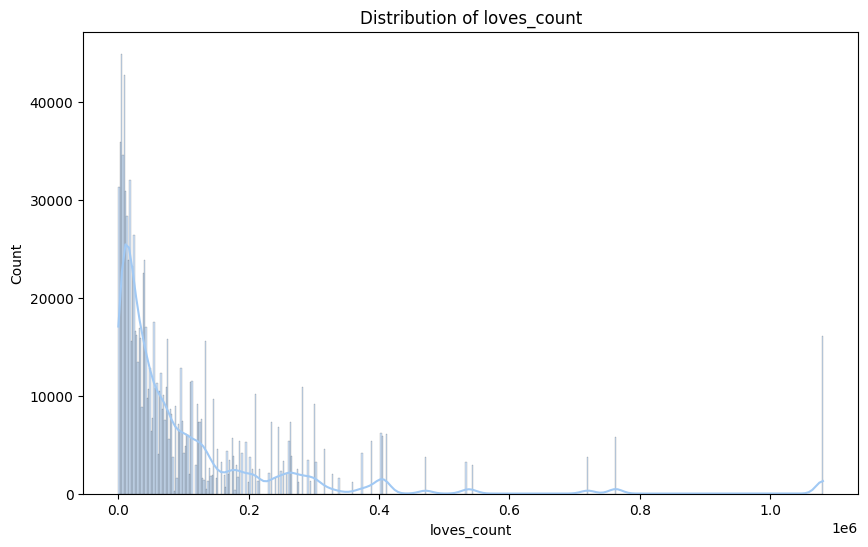

Summary statistics for loves_count:
count    1.092967e+06
mean     1.067510e+05
std      1.675666e+05
min      0.000000e+00
25%      1.665600e+04
50%      4.873900e+04
75%      1.234390e+05
max      1.081315e+06
Name: loves_count, dtype: float64




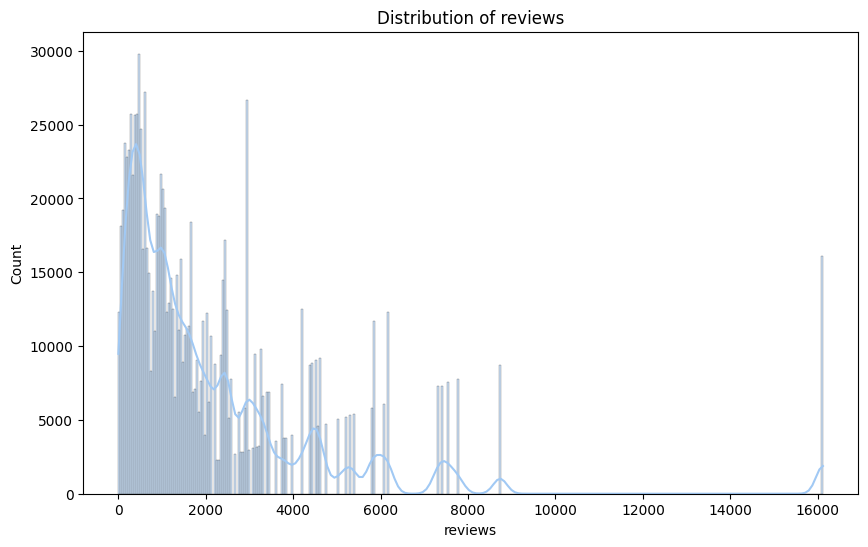

Summary statistics for reviews:
count    1.092967e+06
mean     2.159708e+03
std      2.525222e+03
min      1.000000e+00
25%      5.520000e+02
50%      1.350000e+03
75%      2.911000e+03
max      1.611800e+04
Name: reviews, dtype: float64




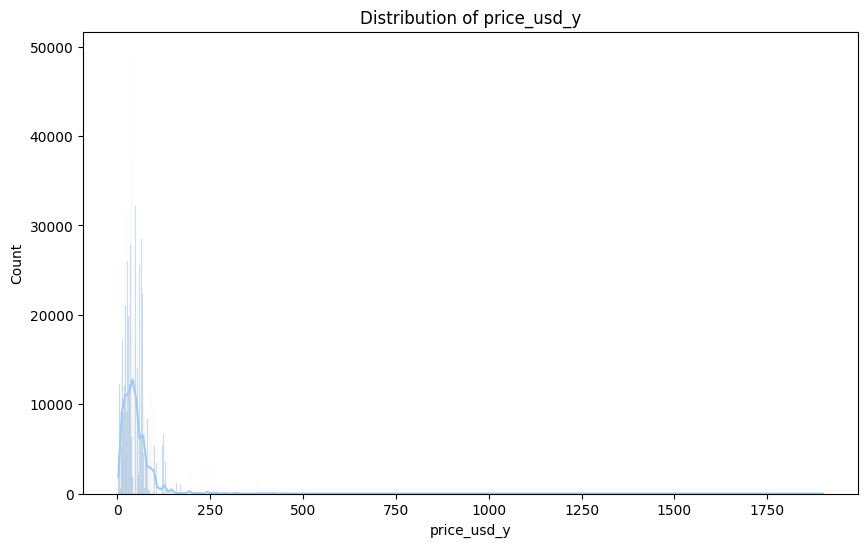

Summary statistics for price_usd_y:
count    1.092967e+06
mean     4.901846e+01
std      4.005519e+01
min      3.000000e+00
25%      2.500000e+01
50%      3.900000e+01
75%      6.200000e+01
max      1.900000e+03
Name: price_usd_y, dtype: float64




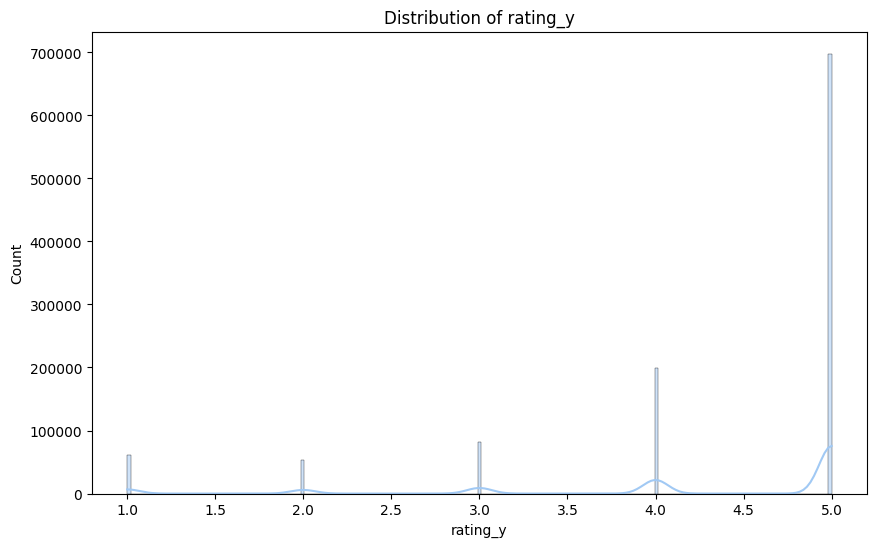

Summary statistics for rating_y:
count    1.092967e+06
mean     4.299153e+00
std      1.149285e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating_y, dtype: float64




In [21]:
# List of numerical columns to analyze
numerical_cols = ['loves_count', 'reviews', 'price_usd_y', 'rating_y']

# Iterate through each numerical column for univariate analysis
for col in numerical_cols:
    # Plot the distribution of the numerical column
    plt.figure(figsize=(10, 6))
    sns.set_palette("pastel")
    sns.histplot(sephora_analysis[col], kde=True)  # Adding KDE for smooth density visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

    # Display summary statistics for the numerical column
    print(f"Summary statistics for {col}:")
    print(sephora_analysis[col].describe())  # Provides mean, median, quartiles, and more
    print("\n")

<b>Plot 1 (Loves Count Distribution):</b><br>

The distribution is right-skewed, with most products having loves count between 0 and 1 million.
A significant concentration of values lies between 0.0 and 0.4 million, indicating moderate user engagement for the majority of products.
Few products have extremely high loves counts, suggesting a small number of items are highly favored.<br><br>
<b>Plot 2 (Review Count Distribution):</b><br>

The distribution is heavily right-skewed, with most products receiving fewer reviews, and only a few items having exceptionally high review counts.
The highest concentration of reviews lies between 0 and 4000, indicating moderate user interaction with most products.
The sharp decline after 4000 reviews suggests fewer products attract a large number of reviews, marking them as outliers.<br><br>
<b>Plot 3 (Price Distribution):</b><br>

Most products are priced in the lower range, with a steep decline in frequency as prices increase.
The distribution has a long right tail, indicating rare high-priced items, which likely cater to premium or niche markets.
The price range is from 0 to 1800 USD, with most products priced well below the higher end.<br><br>
<b>Plot 4 (Ratings Distribution):</b><br>

The majority of ratings are concentrated around 5, with 5 and 4 being the most common ratings.
A high concentration of products receives ratings of 5, indicating strong customer satisfaction for most items.
The distribution shows a relatively small number of products with lower ratings, suggesting fewer negative reviews.

<font size=4><b>1.2 Categorical Variables</b></font>

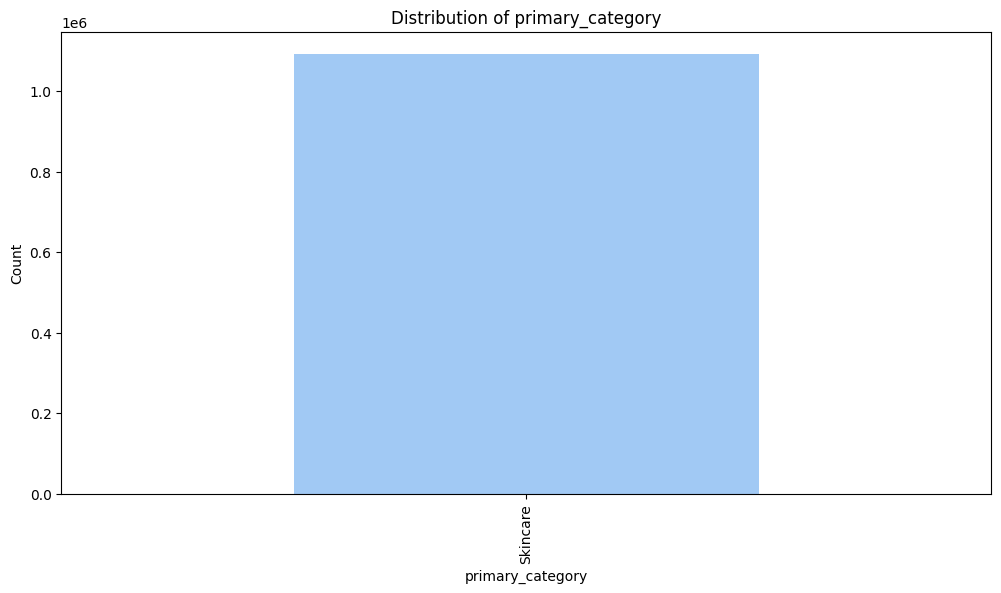

Value counts for primary_category:
primary_category
Skincare    1.0
Name: proportion, dtype: float64




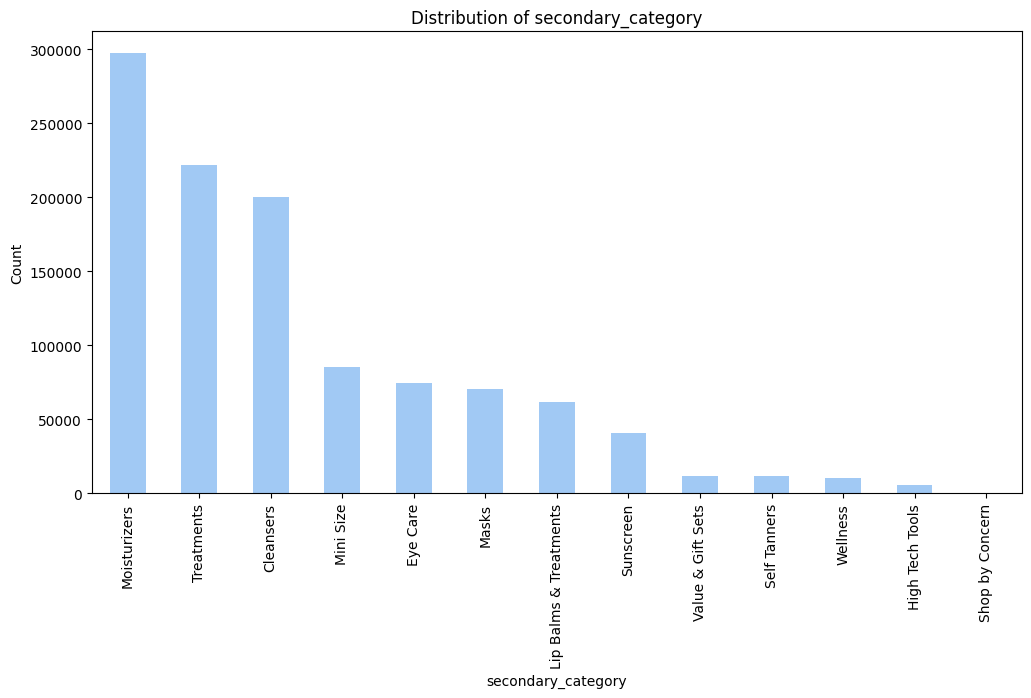

Value counts for secondary_category:
secondary_category
Moisturizers              0.271842
Treatments                0.202833
Cleansers                 0.183263
Mini Size                 0.078133
Eye Care                  0.068546
Masks                     0.064442
Lip Balms & Treatments    0.056314
Sunscreen                 0.037604
Value & Gift Sets         0.011061
Self Tanners              0.010912
Wellness                  0.009621
High Tech Tools           0.005416
Shop by Concern           0.000014
Name: proportion, dtype: float64




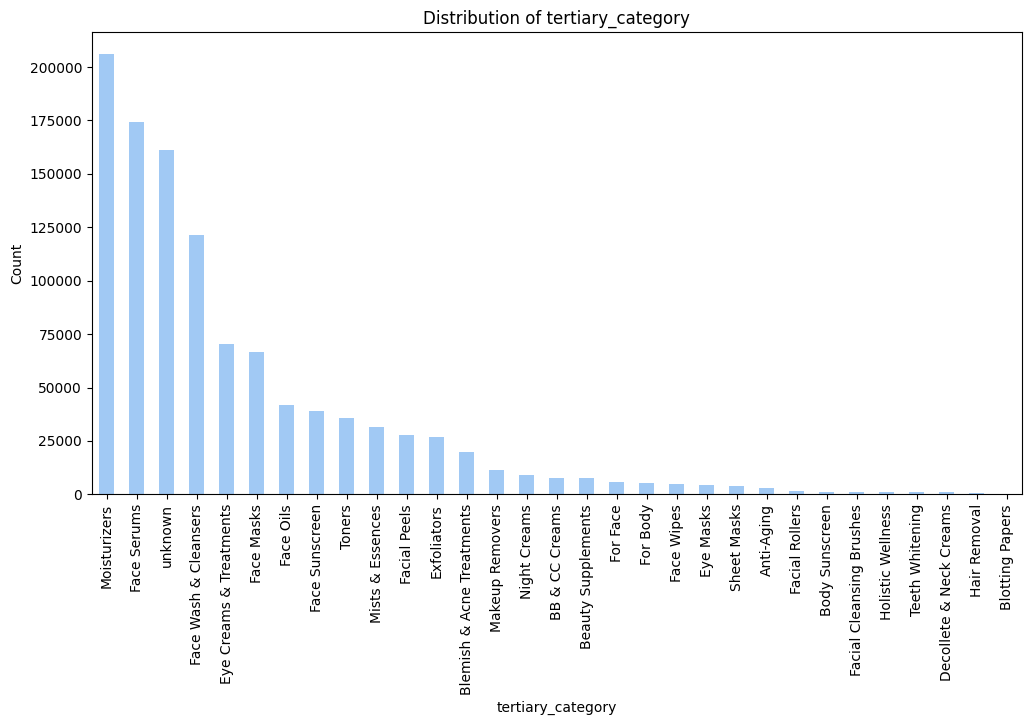

Value counts for tertiary_category:
tertiary_category
Moisturizers                 0.188425
Face Serums                  0.159551
unknown                      0.147311
Face Wash & Cleansers        0.111230
Eye Creams & Treatments      0.064385
Face Masks                   0.061064
Face Oils                    0.038266
Face Sunscreen               0.035732
Toners                       0.032754
Mists & Essences             0.028927
Facial Peels                 0.025282
Exfoliators                  0.024546
Blemish & Acne Treatments    0.018001
Makeup Removers              0.010256
Night Creams                 0.008131
BB & CC Creams               0.007203
Beauty Supplements           0.007062
For Face                     0.005257
For Body                     0.004691
Face Wipes                   0.004271
Eye Masks                    0.004161
Sheet Masks                  0.003378
Anti-Aging                   0.002859
Facial Rollers               0.001562
Body Sunscreen               0.001

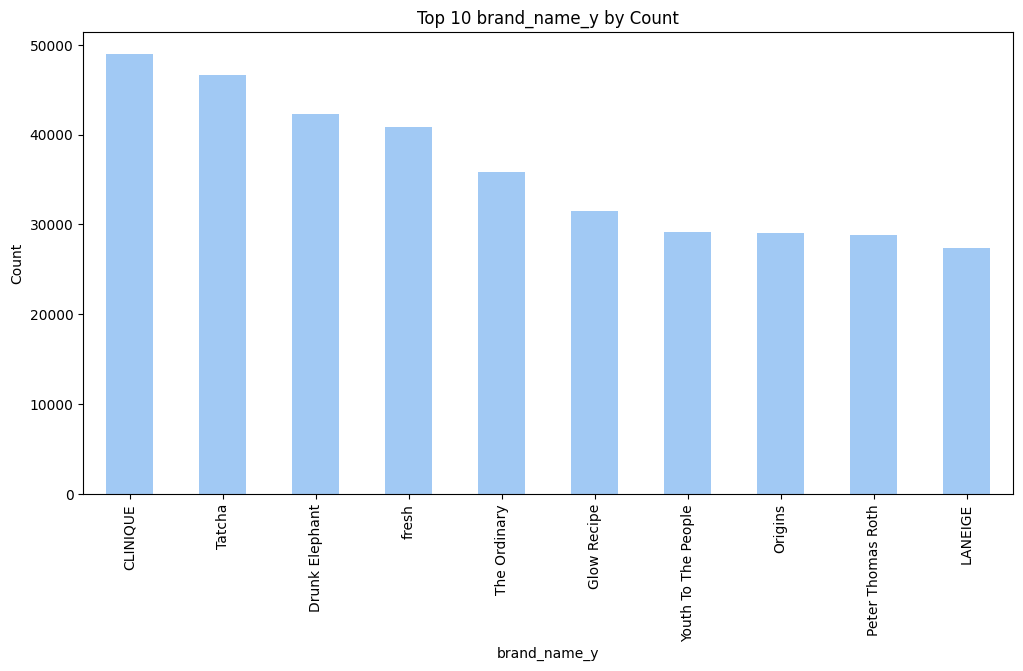

Top 10 Value counts for brand_name_y:
brand_name_y
CLINIQUE               48977
Tatcha                 46687
Drunk Elephant         42309
fresh                  40828
The Ordinary           35809
Glow Recipe            31473
Youth To The People    29119
Origins                29042
Peter Thomas Roth      28818
LANEIGE                27425
Name: count, dtype: int64


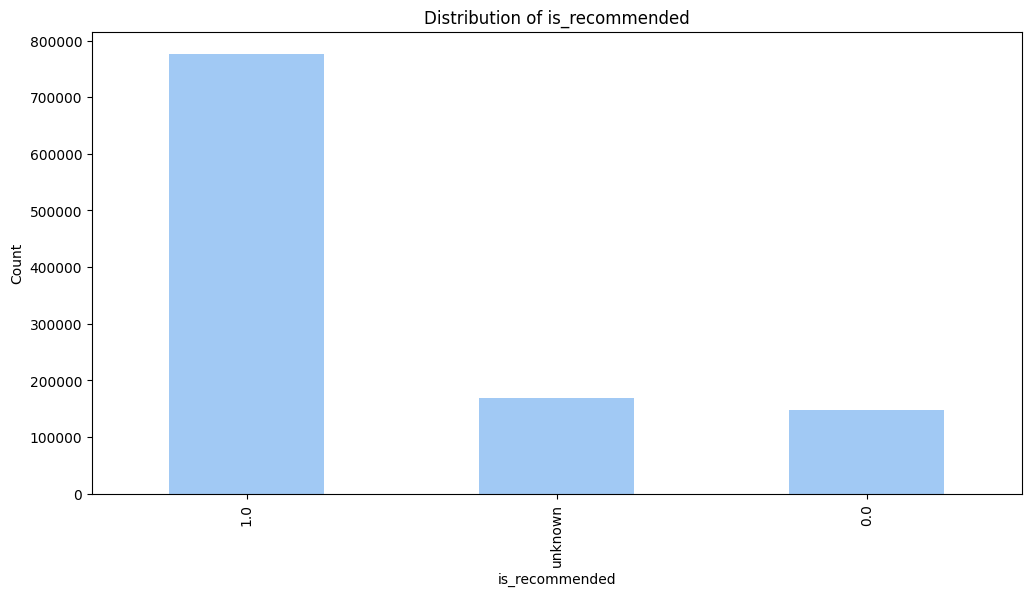

Value counts for is_recommended:
is_recommended
1.0        0.710877
unknown    0.153699
0.0        0.135424
Name: proportion, dtype: float64




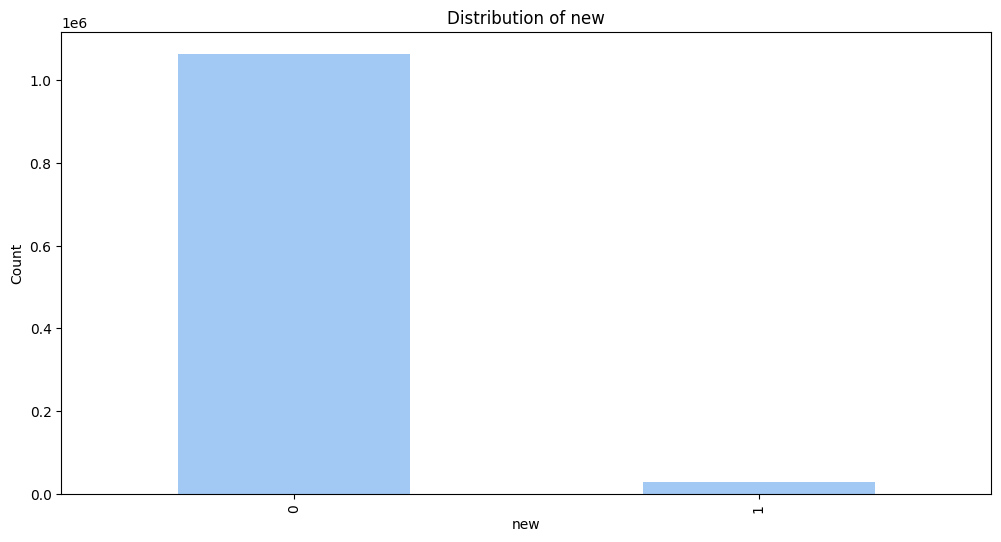

Value counts for new:
new
0    0.973437
1    0.026563
Name: proportion, dtype: float64




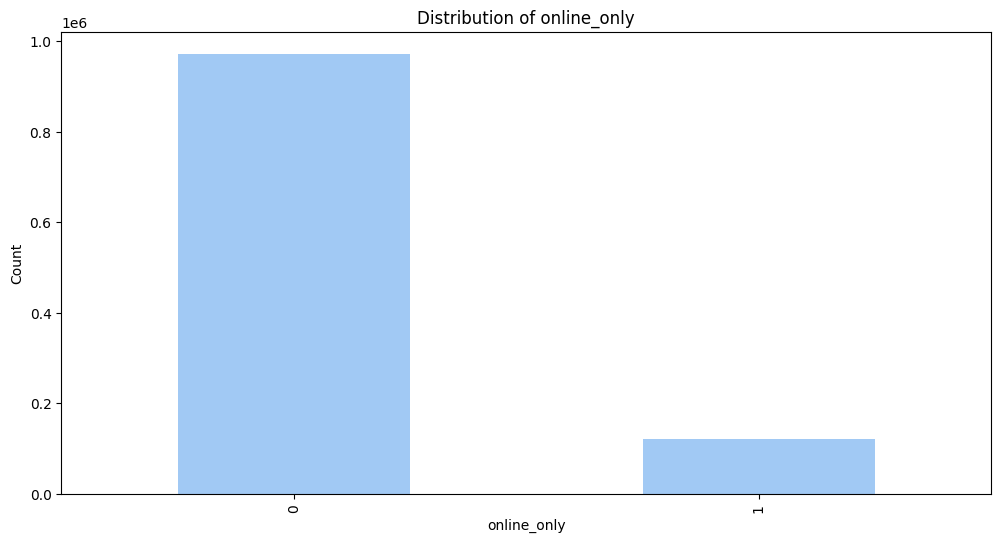

Value counts for online_only:
online_only
0    0.889973
1    0.110027
Name: proportion, dtype: float64




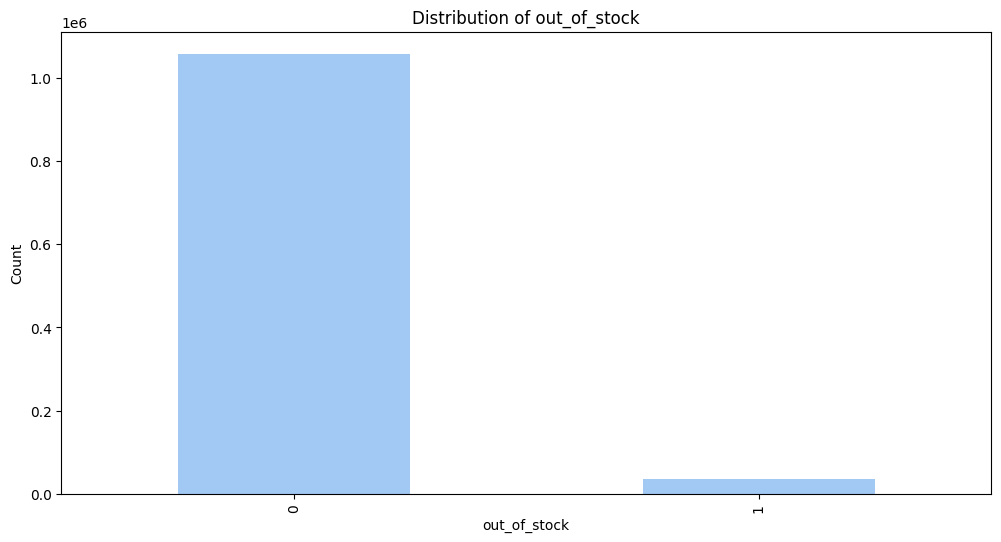

Value counts for out_of_stock:
out_of_stock
0    0.968497
1    0.031503
Name: proportion, dtype: float64




In [22]:
# List of categorical columns to analyze
categorical_cols = ['primary_category', 'secondary_category', 'tertiary_category', 'brand_name_y', 'is_recommended', 'new', 'online_only', 'out_of_stock']

# Iterate through each categorical column for analysis
for col in categorical_cols:
    # For 'brand_name_y', show top 10 brands by count
    if col == 'brand_name_y':
        top_brands = sephora_analysis[col].value_counts().head(10)  # Get top 10 brands by count
        plt.figure(figsize=(12, 6))
        top_brands.plot(kind='bar')  # Plot the top 10 brands as a bar chart
        plt.title(f'Top 10 {col} by Count')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

        # Display the normalized value counts for the top 10 brands
        print(f"Top 10 Value counts for {col}:")
        print(top_brands)
    else:
        # Plot for other categorical columns as usual
        plt.figure(figsize=(12, 6))
        sephora_analysis[col].value_counts().plot(kind='bar')  # Plot the count of each category
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

        # Display the normalized value counts for the categorical column
        print(f"Value counts for {col}:")
        print(sephora_analysis[col].value_counts(normalize=True))  # Normalize to get the relative frequency
        print("\n")


<b>Plot 1: Skincare Category</b><br>
The "Skincare" category dominates with nearly 1,000,000 counts, highlighting its significant market presence.<br><br>
<b>Plot 2: Secondary Category</b><br>
Moisturizers, treatments, and cleansers are the most popular subcategories, indicating high consumer demand for these essentials.
Categories like "High Tech Tools" and "Wellness" show niche interest.<br><br>
<b>Plot 3: Product Types</b><br>
Moisturizers and face serums lead in popularity, reflecting their importance in skincare routines.
Categories like "Blotting Papers" and "Hair Removal" have minimal counts, suggesting limited appeal.<br><br>
<b>Plot 4: Brands</b><br>
CLINIQUE is the most popular brand, indicating strong consumer loyalty.
Emerging brands like Glow Recipe show potential for growth.<br><br>
<b>Plot 5: Recommendation Distribution</b><br>
Positive reviews dominate, with "1.0" being the most frequent recommendation category.
"Unknown" and "0.0" categories indicate areas for further data clarity or product improvement.<br><br>
<b>Plot 6: New Products</b><br>
Most reviews focus on established products, with a significant imbalance favoring the "0" category.
New products ("1") have limited representation, suggesting lower traction or recent market entry.<br><br>
<b>Plot 7: Online-Only Products</b><br>
Most products are available both online and offline, as indicated by the dominance of the "0" category.
A smaller segment is exclusively available online, reflecting limited online-only strategies.<br><br>
<b>Plot 8: Stock Availability</b><br>
A majority of products are in stock, ensuring high availability for consumers.
Few items are out of stock, indicating effective inventory management.

<font size=5><b>2. Bivariate Analysis</b></font>

<font size=4><b>2.1 Numerical vs Numerical</b></font>

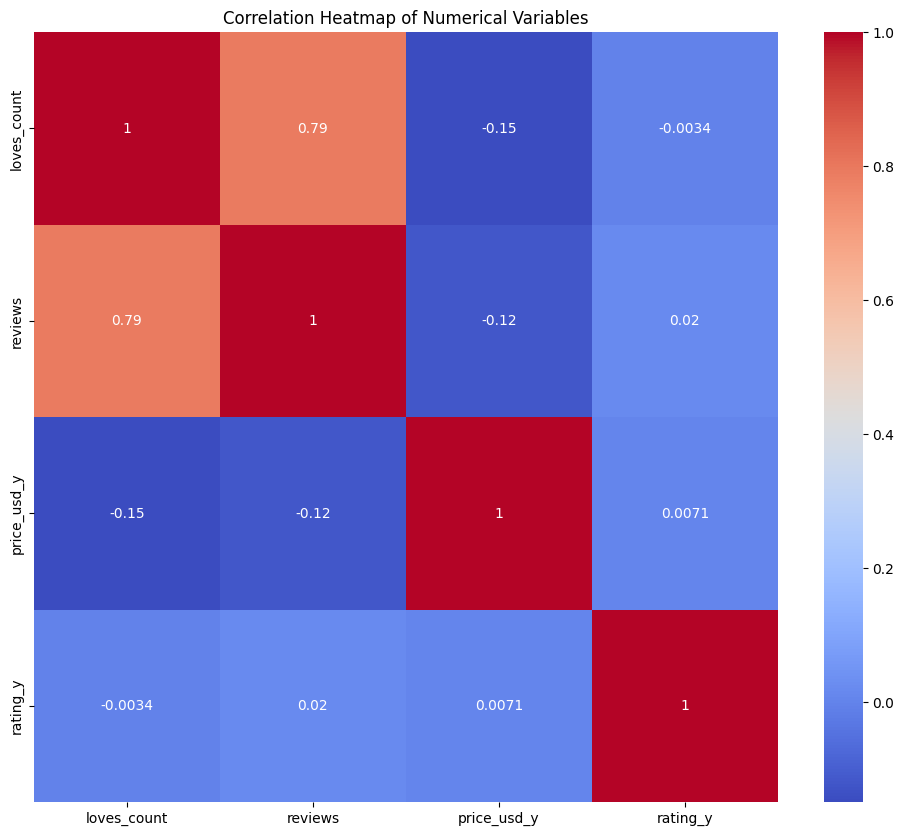

In [23]:
# Plotting the Correlation Heatmap of Numerical Variables
plt.figure(figsize=(12, 10))
# Calculate and plot the correlation matrix for numerical columns, with annotations and a coolwarm color map
sns.heatmap(sephora_analysis[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# # Scatter plots to visualize relationships between numerical variables
# sns.pairplot(sephora_analysis[numerical_cols + ['is_recommended']], hue='is_recommended')  # Plot pairwise relationships and color by 'is_recommended'
# plt.suptitle('Pairplot of Numerical Variables', y=1.02)
# plt.show()




*  loves_count and reviews have a strong positive correlation (0.79). This indicates that products with more reviews tend to have higher love counts, suggesting a relationship between popularity and engagement.<br>

*   price_usd_y and loves_count (-0.15) as well as price_usd_y and reviews (-0.12) show weak negative correlations, implying price has little to no significant effect on product popularity or review counts.<br>


*   rating_y shows negligible correlation with all variables (close to 0), suggesting that ratings are not strongly influenced by price, love count, or reviews.







<font size =4><b>2.2 Categorical vs Numerical</b></font>

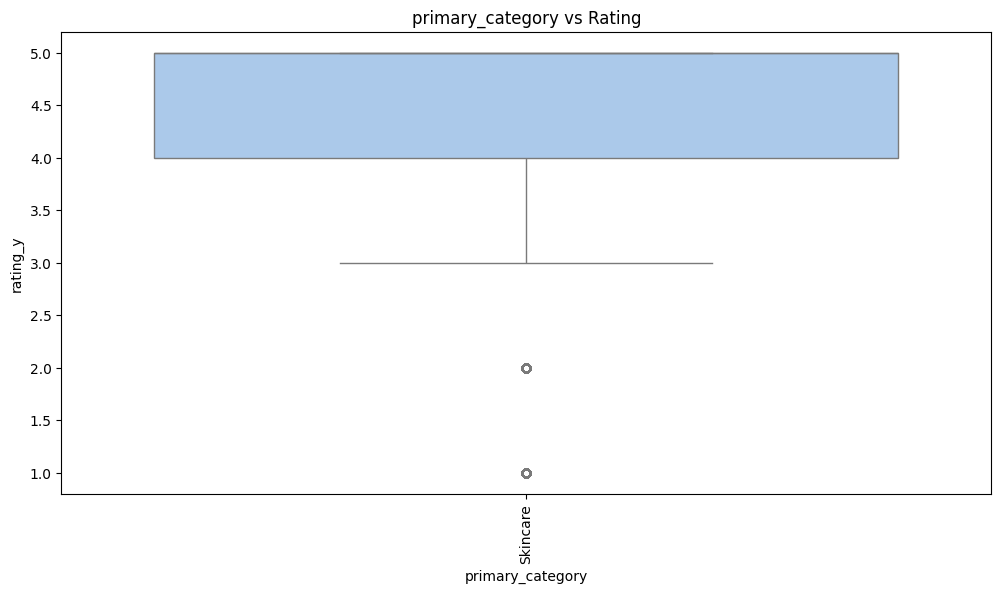

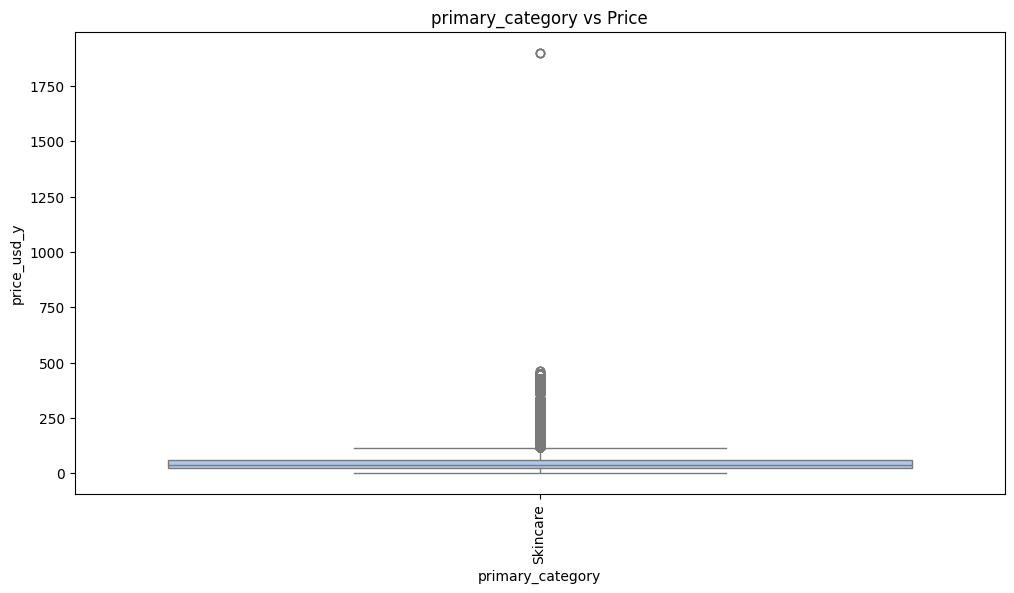

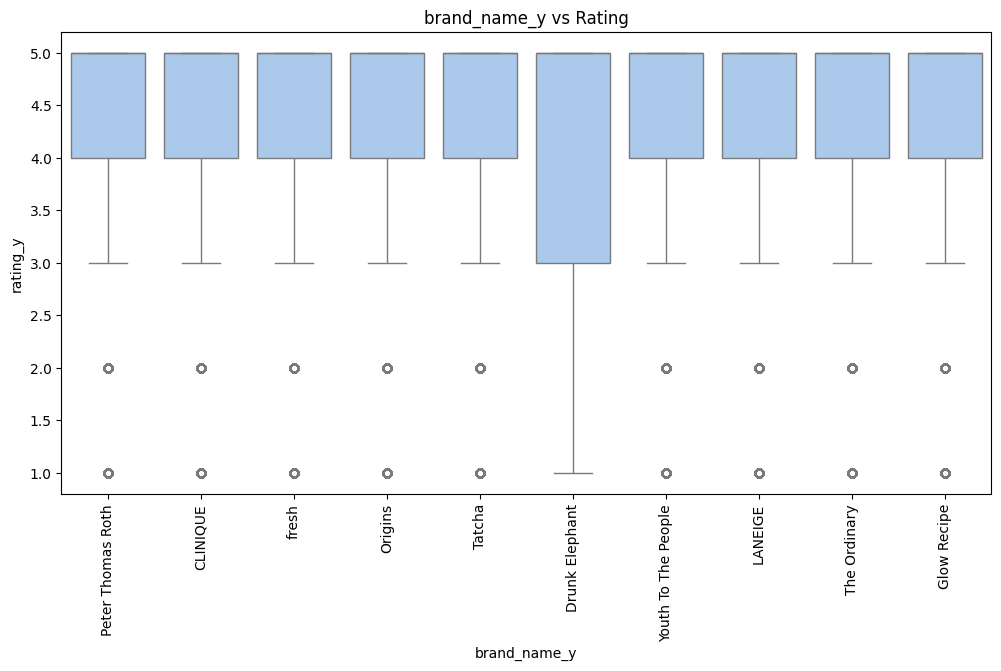

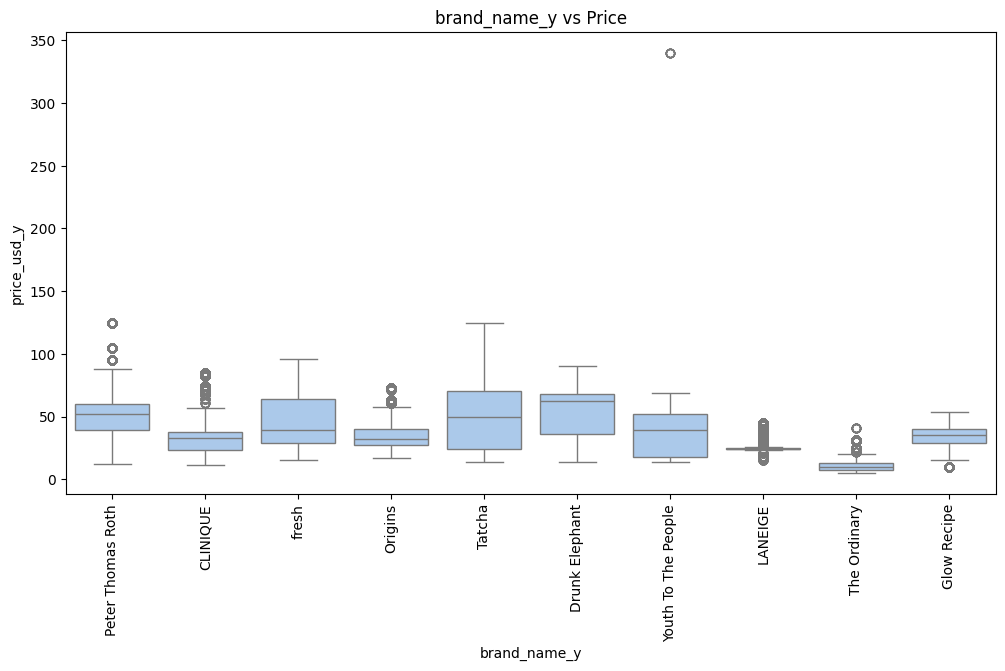

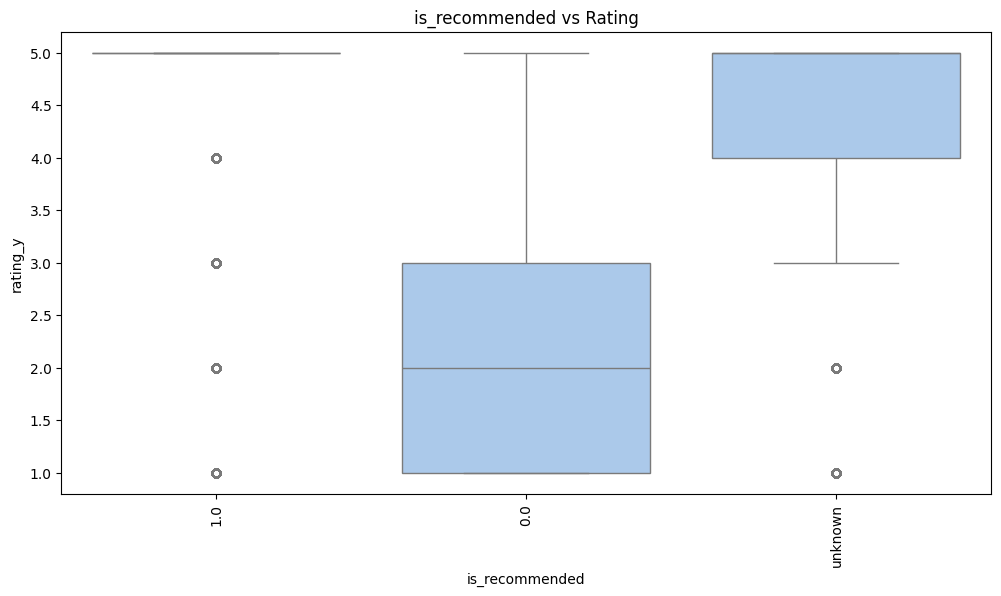

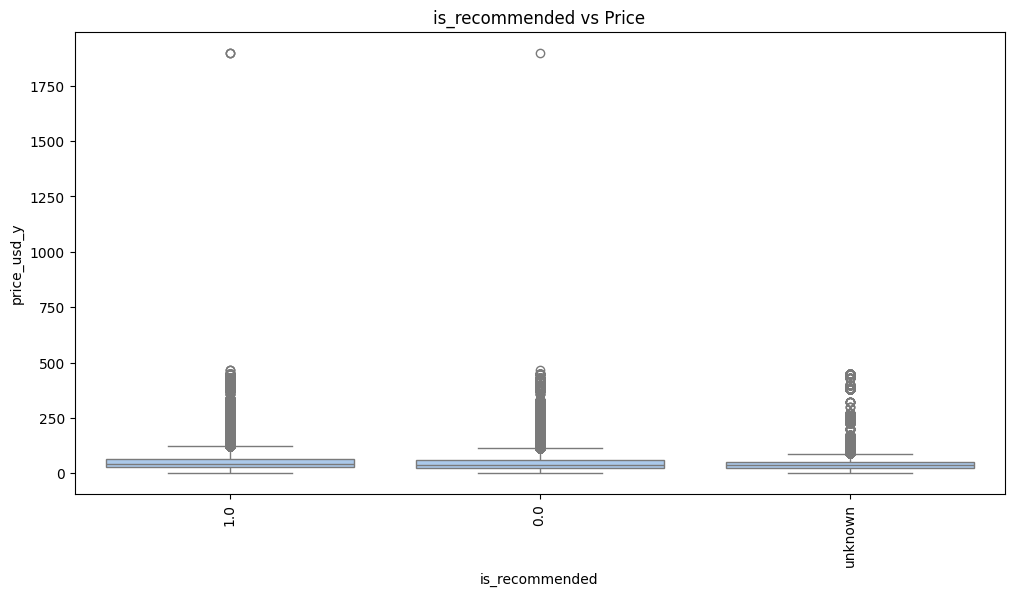

In [24]:
from os import sep

# Get the top 10 brands based on count of products
top_brands = sephora_analysis['brand_name_y'].value_counts().head(10).index

for cat_col in ['primary_category', 'brand_name_y', 'is_recommended']:
    plt.figure(figsize=(12, 6))

    if cat_col == 'brand_name_y':
        # Create a boxplot for 'brand_name_y', but only for the top 10 brands
        sns.boxplot(x=cat_col, y='rating_y', data=sephora_analysis[sephora_analysis['brand_name_y'].isin(top_brands)])
    else:
        # Create a boxplot for other categorical columns vs 'rating_y'
        sns.boxplot(x=cat_col, y='rating_y', data=sephora_analysis)

    plt.title(f'{cat_col} vs Rating')
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(12, 6))

    if cat_col == 'brand_name_y':
        # Create a boxplot for 'brand_name_y', but only for the top 10 brands
        sns.boxplot(x=cat_col, y='price_usd_y', data=sephora_analysis[sephora_analysis['brand_name_y'].isin(top_brands)])
    else:
        # Create a boxplot for other categorical columns vs 'price_usd_y'
        sns.boxplot(x=cat_col, y='price_usd_y', data=sephora_analysis)

    plt.title(f'{cat_col} vs Price')
    plt.xticks(rotation=90)
    plt.show()


<b><font size=3>Customer Ratings vs Primary Category</b><br>
<li>The median rating for skincare products is 4.8, indicating consistently high customer satisfaction.</li>
<li>A few products have ratings as low as 1.0, suggesting specific issues that need attention.</li><br>
<b>Primary Category vs Price</b><br>
<li>The median price of Skincare products is around usd50, suggesting a typical price point within the category.</li>
<li>While most products fall between usd20 and usd100, there is an outlier with high price, indicating the presence of premium, luxury products in the Skincare category.</li><br>
<b>Brand name vs Rating</b><br>
<li>Most skincare brands have a relatively high median rating around 4.5, suggesting that customers generally rate these brands positively.</li>
<li>Some brands, like Drunk Elephant and Glow Recipe, show notable outliers with lower ratings, indicating occasional customer dissatisfaction or inconsistent product performance.</li><br>
<b>Brandname vs Price</b><br>
<li>Brands like Tatcha and Drunk Elephant show a wide range of prices, indicating both budget-friendly and luxury options within these brands.</li>
<li> Most skincare brands have a median price around the 50 to 100 USD range, suggesting a moderate price point for the majority of products in these categories.</li><br>
<b>is_recommended vs Rating</b><br>
<li>All recommended products have perfect ratings of 5.0, indicating strong customer satisfaction.</li>
<li>Non-recommended products have a wider range of ratings, with some receiving lower scores around 2.0, but there are also a few outliers with higher ratings.</li>
<br>
<b>is_recommended vs Price</b><br>
<li> Despite a relatively low median price, recommended products include several high-priced luxury items, with prices reaching up to $2000.</li>
<li>he median price is similar to recommended products, but there are fewer high-priced outliers, indicating a less diverse price range.</li>
</font>









<font size =4><b>2.3 Categorical vs Categorical</b></font>

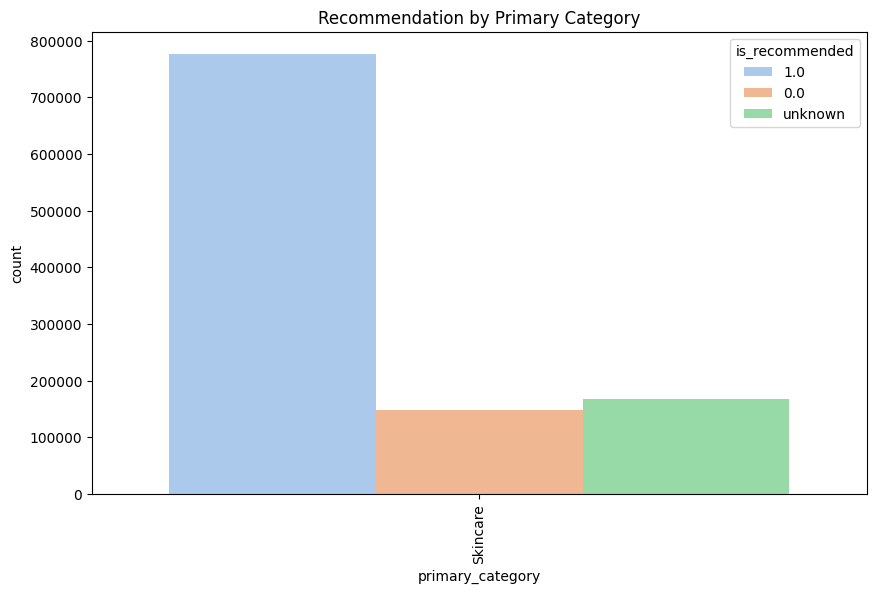

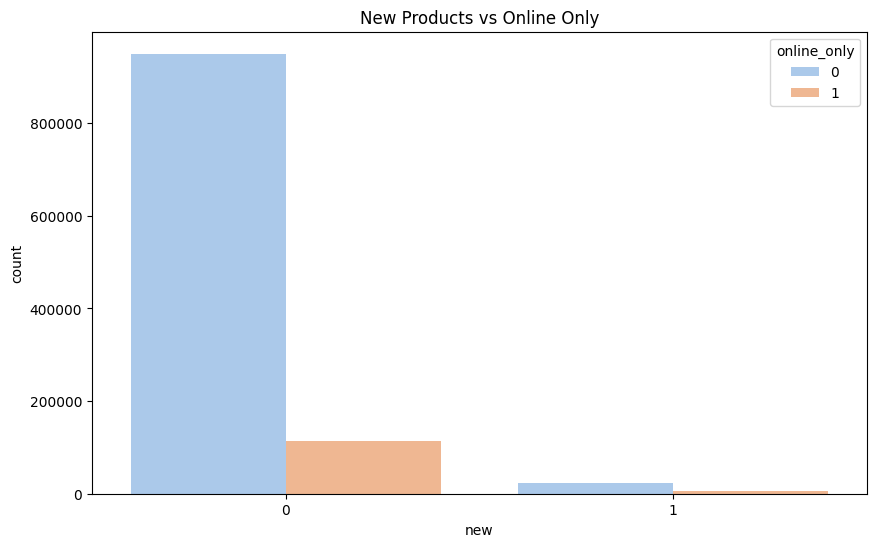

In [25]:
plt.figure(figsize=(10, 6))
# Create a countplot showing the count of recommended vs non-recommended products in each primary category
sns.countplot(x='primary_category', hue='is_recommended', data=sephora_analysis)
plt.title('Recommendation by Primary Category')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
# Countplot to show the relationship between new products and online exclusivity
sns.countplot(x='new', hue='online_only', data=sephora_analysis)
plt.title('New Products vs Online Only')
plt.show()

<b>Recommendation by Primary Category</b>


<li>The majority of items in the Skincare category are recommended, with a count of nearly 800,000, indicating strong positive feedback from customers.
<li>Only a small portion of items (slightly above 100,000) are not recommended, suggesting that most products perform well in customer reviews.

<b>New Products vs Online Only</b>


<li>The majority of products are non-new, with a significant count in both online-only and non-online-only categories.
<li>Among new products, a larger proportion is online-only, indicating a trend where new products are more likely to be sold exclusively online.




<font size =5><b>3. Other Relevant Relations</b>

<font size =4><b>3.1 Price vs Popularity</b></font>

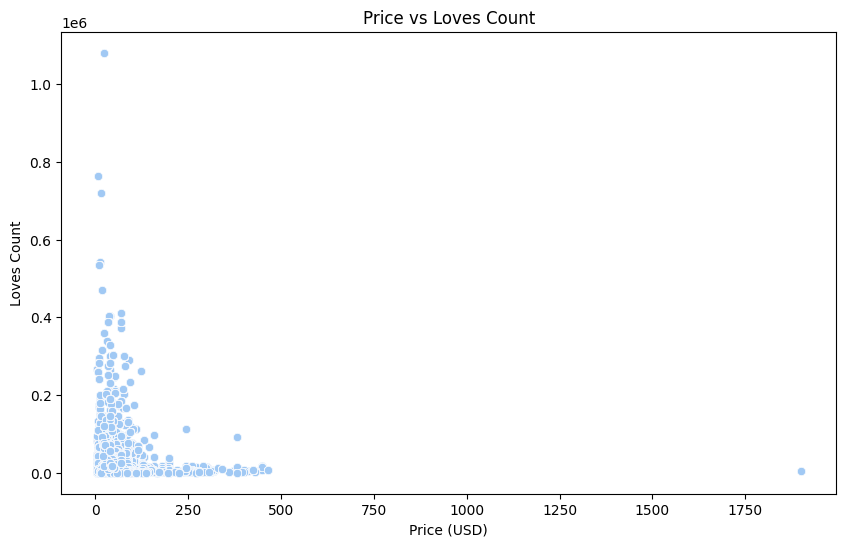

In [26]:
# Scatter plot to visualize the relationship between price and loves count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_usd_y', y='loves_count', data=sephora_analysis)
plt.title('Price vs Loves Count')
plt.xlabel('Price (USD)')
plt.ylabel('Loves Count')
plt.show()



*   Most products are priced low (0 to 250 USD) and have a moderate number of loves, indicating that affordability might be linked to higher popularity.
*   A few higher-priced products (500 to 1750 USD) have relatively high loves counts, suggesting that premium products can still attract significant customer attention.



<font size=4><b>3.2 Word Cloud of Product Highlights</b></font>

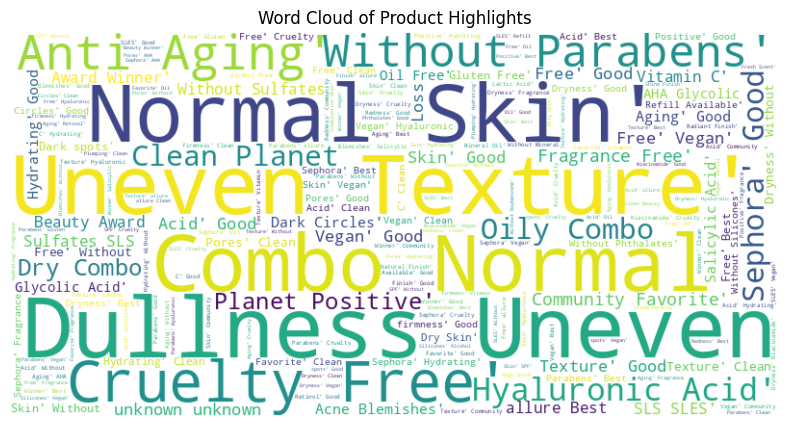

In [27]:
from wordcloud import WordCloud

# Join all the highlights into a single string
all_highlights = ' '.join(sephora_analysis['highlights'])

# Generate a word cloud from the 'highlights' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_highlights)

plt.figure(figsize=(10, 5))
# Display the generated word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Highlights')
plt.show()

<font size=3><b><li>Focus on Skin Concerns and Features:</li></b>
  Keywords like "Dullness", "Uneven Texture", and "Normal Skin" suggest that many products are tailored toward addressing skin concerns, particularly improving texture and addressing dullness.

<b><li>Emphasis on Ethical and Clean Beauty:</li></b>
  Terms such as "Cruelty-Free", "Without Parabens", and "Without Sulfates" highlight the importance of clean, ethical beauty products, aligning with consumer preferences for sustainability and non-toxic ingredients.</font>

<font size=4><b>3.3 Sentimental Analysis</b></font>

In [28]:
sephora_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092967 entries, 12 to 1100550
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   product_id          1092967 non-null  object        
 1   brand_id            1092967 non-null  int64         
 2   loves_count         1092967 non-null  int64         
 3   reviews             1092967 non-null  float64       
 4   size                1092967 non-null  object        
 5   ingredients         1092967 non-null  object        
 6   new                 1092967 non-null  int64         
 7   online_only         1092967 non-null  int64         
 8   out_of_stock        1092967 non-null  int64         
 9   highlights          1092967 non-null  object        
 10  primary_category    1092967 non-null  object        
 11  secondary_category  1092967 non-null  object        
 12  tertiary_category   1092967 non-null  object        
 13  Unnamed: 0      

<font size=4><b>3.4 Product Score Distribution</b></font>

In [29]:
import plotly.express as px

# Plotting the distribution of product ratings
fig = px.histogram(
    sephora_analysis,
    x='rating_y',
    nbins=20,
    title='Distribution of Product Ratings',
    labels={'rating_y': 'Rating'},
    color_discrete_sequence=['skyblue']
)

# Updating layout for better readability
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Count',
    title_font_size=16,
    xaxis=dict(showgrid=True,tickmode='array',tickvals=[1, 2, 3, 4, 5]),
    yaxis=dict(showgrid=True),
    template='plotly_white'
)

fig.show()

# Displaying summary statistics for 'rating_y'
print("Summary statistics for 'rating_y':")
print(sephora_analysis['rating_y'].describe().to_frame())

Summary statistics for 'rating_y':
           rating_y
count  1.092967e+06
mean   4.299153e+00
std    1.149285e+00
min    1.000000e+00
25%    4.000000e+00
50%    5.000000e+00
75%    5.000000e+00
max    5.000000e+00


<font size =3><li><b>5-Star Dominance:</b> Most users gave 5-star ratings, reflecting high customer satisfaction and product quality.</li>
<li><b>Low Negative Feedback</b> 1- and 2-star ratings are minimal, indicating few dissatisfied customers.</li>
<li><b>Improvement Opportunity:</b> Analyze low ratings to address issues and maintain high standards.</li></font>

<Font size= 5><b>4 Text Preprocessing</b>

In [30]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer

# Download necessary NLTK data
import nltk
nltk.download('stopwords')
def preprocess_review(text, remove_digits=True):
    # Initialize necessary components
    ps = PorterStemmer()
    stopword_list = set(stopwords.words('english'))
    tokenizer = ToktokTokenizer()

    # Remove HTML tags
    def remove_html_tags(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()

    # Remove square brackets and their contents
    def remove_square_brackets(text):
        return re.sub(r'\[[^]]*\]', '', text)

    # Main text preprocessing function
    def clean_text(text, remove_digits):
        text = remove_html_tags(text)  # Remove HTML tags
        text = remove_square_brackets(text)  # Remove square brackets and content
        if remove_digits:
            text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove digits
        else:
            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphanumeric characters
        text = text.lower()  # Convert to lowercase
        return text

    # Tokenize, stem and remove stopwords
    def stem_and_remove_stopwords(text):
        tokens = tokenizer.tokenize(text)
        stems = [ps.stem(token) for token in tokens if token not in stopword_list]
        return ' '.join(stems)

    # Clean and preprocess the review text
    cleaned_text = clean_text(text, remove_digits)
    processed_text = stem_and_remove_stopwords(cleaned_text)
    return processed_text

# Apply preprocessing to the 'review_text' column
sephora_analysis['processed_review'] = sephora_analysis['review_text'].apply(preprocess_review)

# Example to check before and after
print('BEFORE (preprocess_review):\n', sephora_analysis['review_text'].iloc[2])
print('\nAFTER (preprocess_review):\n', sephora_analysis['processed_review'].iloc[2])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


BEFORE (preprocess_review):
 This depuffs super well. Does not help with dark circles at all though.

AFTER (preprocess_review):
 depuff super well help dark circl though


<font size=5><b>5 Word Clouds - Positive and Negative</b></font>

In [31]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Check for empty rows
empty_rows = sephora_analysis[sephora_analysis['review_text'].str.strip().isna()]
print("Empty rows:")
print(empty_rows)

# Ensure reviews and titles are string datatypes
sephora_analysis['review_text'] = sephora_analysis['review_text'].astype(str)
sephora_analysis['review_title'] = sephora_analysis['review_title'].astype(str)

# Create stopword list
stop_words = set(stopwords.words('english'))
stop_words.update(['day', 'night', 'received', 'make', 'week', 'morning', 'put', 'leave'])

Empty rows:
Empty DataFrame
Columns: [product_id, brand_id, loves_count, reviews, size, ingredients, new, online_only, out_of_stock, highlights, primary_category, secondary_category, tertiary_category, Unnamed: 0, author_id, rating_y, is_recommended, submission_time, review_text, review_title, product_name_y, brand_name_y, price_usd_y, processed_review]
Index: []

[0 rows x 24 columns]


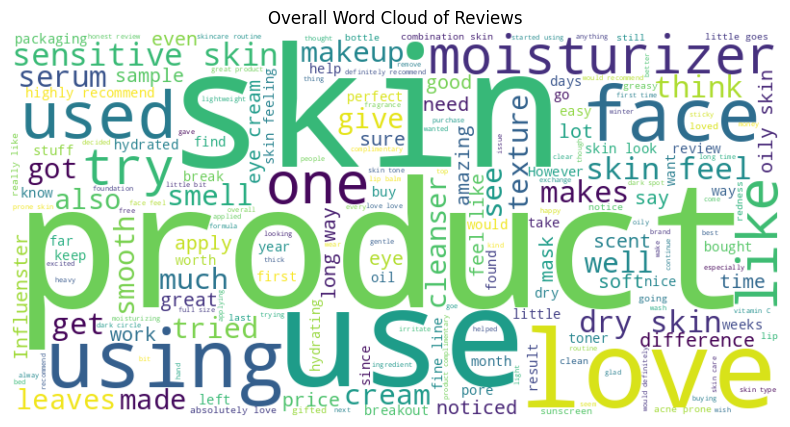

In [32]:
# Function to create and display a word cloud
def create_wordcloud(text, stopwords, title):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='viridis', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

all_reviews_text = " ".join(review for review in sephora_analysis.review_text)
create_wordcloud(all_reviews_text, stop_words, "Overall Word Cloud of Reviews")

<font size=3><li><b>Focus on Skin and Usage:</b> The prominence of words like "skin," "use," and "face" indicates that reviews often center around the product's application and its effects on the skin, emphasizing the importance of efficacy.</li>

<li><b>Popular Product Types:</b> Frequently mentioned items like "moisturizer," "serum," and "cleanser" suggest that these are the most reviewed and significant product categories for customers.</li>

<li><b>Experience Matters:</b> Words such as "texture," "feel," and "hydration" highlight that customers value sensory experiences and visible results, providing guidance for product development and marketing efforts.</li></font>

<font size=5><b>6 Model-Sentimental Analysis</b>

<font size =4><b>6.1 Lexicon-Based Analysis</b></font>

In [33]:
# Install necessary libraries
!pip install textblob

In [34]:
# Import necessary libraries
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'processed_review' column
sephora_analysis['sentiment_polarity'] = sephora_analysis['processed_review'].apply(get_sentiment)

# Function to categorize sentiment
def categorize_sentiment(polarity):
  if polarity > 0.1:
    return 'Positive'
  elif polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

# Categorize sentiments
sephora_analysis['sentiment_category'] = sephora_analysis['sentiment_polarity'].apply(categorize_sentiment)

# Print the first few rows to check the results
print(sephora_analysis[['processed_review', 'sentiment_polarity', 'sentiment_category']].head())

                                     processed_review  sentiment_polarity  \
12  nice consist howev im sure promis didnt need s...            0.433333   
13  cannot express much love eye cream driest flak...            0.195833   
14           depuff super well help dark circl though            0.091667   
15  love keep crow feet fine line away wear everi ...            0.458333   
16  im honestli say help wrinkl puffi eye brighten...            0.700000   

   sentiment_category  
12           Positive  
13           Positive  
14            Neutral  
15           Positive  
16           Positive  


<font size =4><b>6.2 Analyze Sentiment Distribution</b></font>

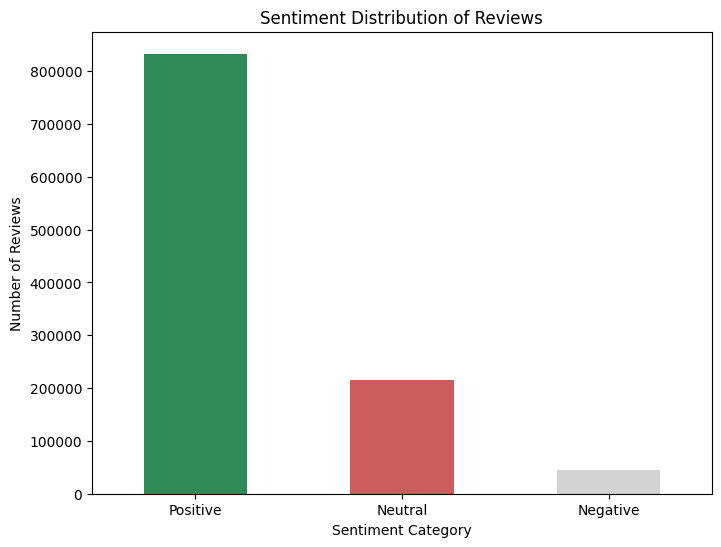

In [35]:
# Plot the distribution of sentiment categories
sentiment_counts = sephora_analysis['sentiment_category'].value_counts()

# Plotting the results
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['seagreen', 'indianred', 'lightgray'])
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()


<font size=3><li><b>High Customer Satisfaction:</b> The overwhelming majority of reviews are positive, indicating strong customer approval and satisfaction with the products.</li>

<li><b>Moderate Neutral Sentiment:</b> Neutral reviews form a noticeable portion, reflecting mixed or indifferent customer experiences.</li>

<li><b>Low Negative Sentiment:</b> The relatively small count of negative reviews suggests limited dissatisfaction, pointing to overall effective product performance and customer service.</li></font>

<font size =4><b>6.3 Sentiment Analysis for Review Length</b></font>

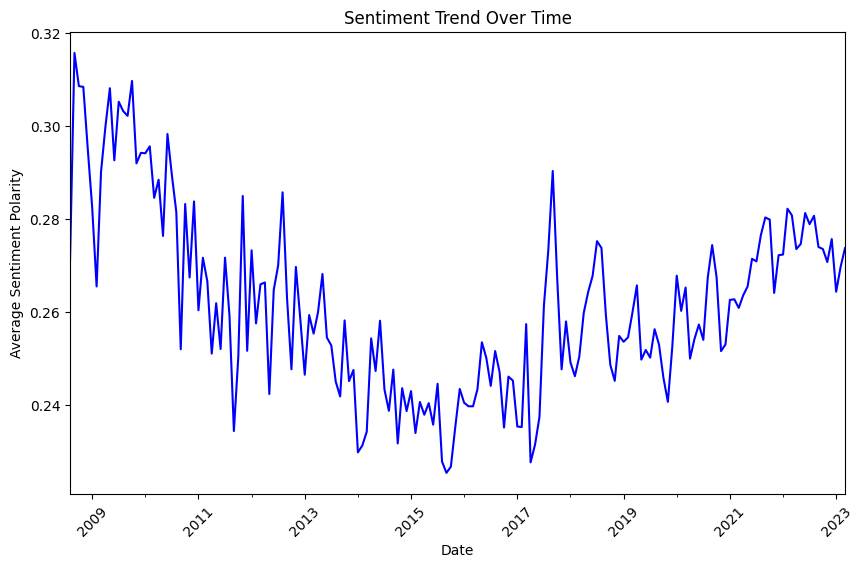

In [36]:
# Ensure the review date is in datetime format
sephora_analysis['submission_time'] = pd.to_datetime(sephora_analysis['submission_time'])

# Group by month and calculate average sentiment polarity
sentiment_trends = sephora_analysis.groupby(sephora_analysis['submission_time'].dt.to_period('M'))['sentiment_polarity'].mean()

# Plot sentiment trend over time
sentiment_trends.plot(kind='line', figsize=(10, 6), color='blue')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()

<font size=3><li><b>Initial Decline (2009–2013):</b> Average sentiment polarity decreased significantly, possibly due to increased negative events or perceptions during that period.</li>
<li><b>Fluctuation and Recovery (2015–2019):</b> Sentiment showed fluctuations with a notable spike around 2017, indicating a positive response to specific events or actions.</li>
<li><b>Steady Growth (2019–2023):</b> Sentiment polarity has been steadily improving, signaling increased optimism or favorable developments in recent years.</li></font>

<font size =4><b>6.4 Word Cloud for Positive, Negative, and Neutral Reviews</b></font>

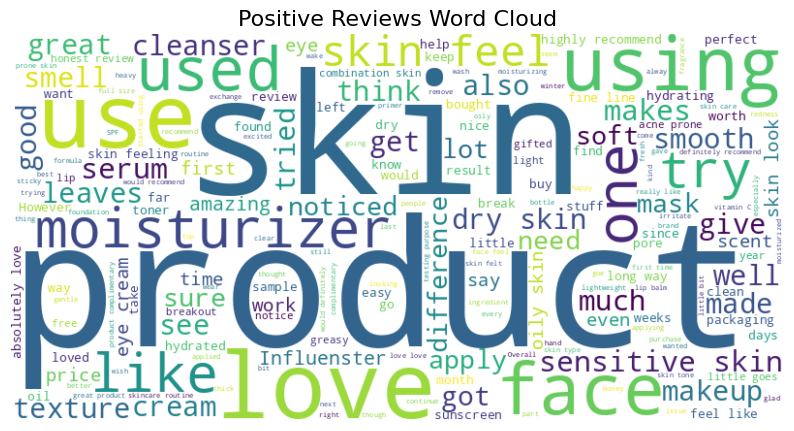

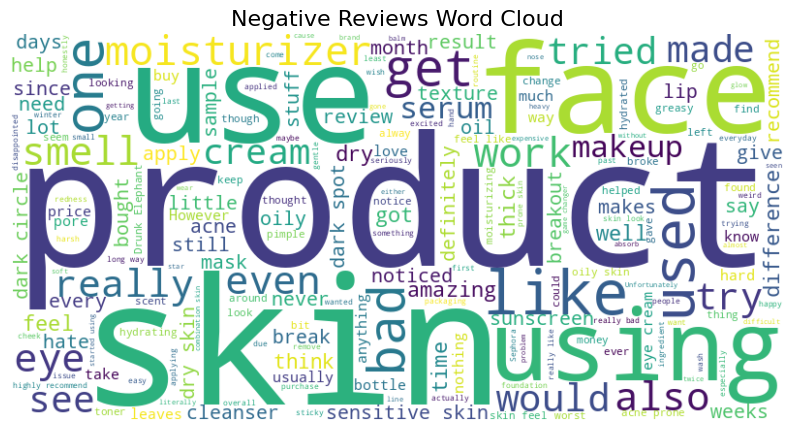

In [37]:
# Function to create and display word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(
        stopwords=stop_words,
        background_color='white',
        colormap='viridis',
        width=800,
        height=400
    ).generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Generate word cloud for positive reviews
positive_reviews = " ".join(review for review in sephora_analysis[sephora_analysis['sentiment_category'] == 'Positive']['review_text'])
create_wordcloud(positive_reviews, "Positive Reviews Word Cloud")

# Generate word cloud for negative reviews
negative_reviews = " ".join(review for review in sephora_analysis[sephora_analysis['sentiment_category'] == 'Negative']['review_text'])
create_wordcloud(negative_reviews, "Negative Reviews Word Cloud")


<font size=3><b>Plot 1: Positive review wordcloud</b><br>
<li><b>Skincare Products Dominate:</b> Positive reviews frequently mention products like moisturizers, serums, and cleansers, highlighting their popularity and effectiveness.</li>

<li><b>Emotional Satisfaction:</b> Words like "love" and "amazing" reflect strong customer satisfaction and loyalty.</li>

<li><b>Focus on Benefits:</b> Attributes such as hydration, smooth texture, and ease of application are highly appreciated, suggesting key selling points for marketing.</li></font>

<font size=3><b>Plot 2: Negative review wordcloud</b><br>
<li><b>Skin Concerns Dominate:</b> Negative reviews frequently highlight issues like dryness, oiliness, and breakouts, indicating dissatisfaction with the product's impact on the skin.</li>

<li><b>Product Types Criticized:</b> Common complaints revolve around moisturizers, creams, serums, cleansers, and sunscreens, suggesting these categories need better formulation or marketing clarity.</li>

<li><b>Specific Complaints:</b> Words like "smell," "time," and "difference" point to dissatisfaction with product scent, perceived inefficacy, and lack of noticeable results. These insights can guide brands in improving quality and customer satisfaction.</li></font>

<font size=6><b>Machine Learning Models</b></font>

<font size=5><b>Step 1: Prepare the Data (with Balancing)</b></font>

In [38]:
from sklearn.utils import resample

# Separate positive, neutral, and negative reviews
positive_reviews = sephora_analysis[sephora_analysis['sentiment_category'] == 'Positive']
neutral_reviews = sephora_analysis[sephora_analysis['sentiment_category'] == 'Neutral']
negative_reviews = sephora_analysis[sephora_analysis['sentiment_category'] == 'Negative']

# Upsample the minority classes to match the size of the positive reviews
negative_upsampled = resample(negative_reviews,
                              replace=True,  # With replacement
                              n_samples=len(positive_reviews),  # Match the size of positive reviews
                              random_state=42)

neutral_upsampled = resample(neutral_reviews,
                              replace=True,  # With replacement
                              n_samples=len(positive_reviews),  # Match the size of positive reviews
                              random_state=42)

# Combine the upsampled negative and neutral reviews with the original positive reviews
balanced_sephora_analysis = pd.concat([positive_reviews, neutral_upsampled, negative_upsampled])

# Shuffle the dataset to mix the classes randomly
balanced_sephora_analysis = balanced_sephora_analysis.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print(balanced_sephora_analysis['sentiment_category'].value_counts())


sentiment_category
Positive    833056
Negative    833056
Neutral     833056
Name: count, dtype: int64


<font size=5><b>Step2: Feature Engineering (TF-IDF Vectorization)</b></font>

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features value as needed
X_tfidf = tfidf_vectorizer.fit_transform(balanced_sephora_analysis['processed_review'])

# Target variable
y = balanced_sephora_analysis['sentiment_category']

# Show the shape of the transformed data
print(X_tfidf.shape)


(2499168, 5000)


<font size=5><b>Step 3: Model 1 - Logistic Regression</b></font>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
LR_score=accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", LR_score)
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9605429002428806
              precision    recall  f1-score   support

    Negative       0.96      0.98      0.97    166748
     Neutral       0.93      0.95      0.94    166178
    Positive       0.99      0.95      0.97    166908

    accuracy                           0.96    499834
   macro avg       0.96      0.96      0.96    499834
weighted avg       0.96      0.96      0.96    499834



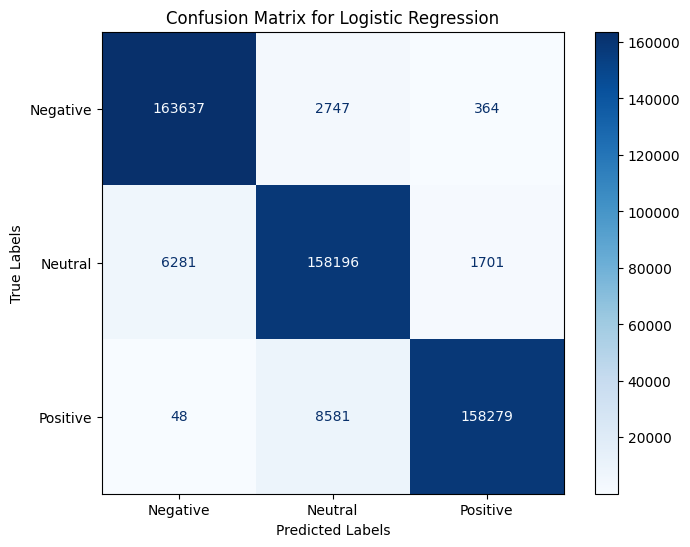

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg, labels=logreg_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg_model.classes_)
disp.plot(cmap="Blues", values_format="d", ax=plt.gca())

plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [42]:
# Training accuracy
y_pred_train_logreg = logreg_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train_logreg)
print(f"Logistic Regression Training Accuracy: {training_accuracy}")

# Testing accuracy (already calculated above)
testing_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Testing Accuracy: {testing_accuracy}")

Logistic Regression Training Accuracy: 0.9616547310254314
Logistic Regression Testing Accuracy: 0.9605429002428806


<font size=3>The Logistic Regression model demonstrates excellent performance, with high F1 scores for Positive (0.97), Negative (0.97), and Neutral (0.94) classes. The confusion matrix highlights accurate predictions, with minimal misclassifications, particularly for Positive and Negative labels. The model achieves a training accuracy of 0.961 and a testing accuracy of 0.960, indicating strong generalization without overfitting. While Neutral predictions show slightly more overlap with other classes, the overall performance is robust and reliable for this dataset.</font>

<font size=5><b>Step 4: Model 2 - Random Forest Classifier</b></font>

In [43]:
# Map sentiment labels to integers
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_numeric = y.map(label_mapping)

# Confirm the mapping
print("Mapped Labels:", y_numeric.unique())


Mapped Labels: [2 0 1]


In [44]:
# Reduce dataset size for Random Forest and XGBoost
sample_size = 50000  # Adjust as needed
X_sample, _, y_sample, _ = train_test_split(X_tfidf, y_numeric, train_size=sample_size, random_state=42, stratify=y_numeric)

# Check the shape of the sampled dataset
print("Sampled Data Shape:", X_sample.shape)
print("Sampled Labels Shape:", y_sample.shape)


Sampled Data Shape: (50000, 5000)
Sampled Labels Shape: (50000,)


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_sample, y_sample)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy (Sampled):", accuracy_score(y_test.map(label_mapping), y_pred_rf))
print(classification_report(y_test.map(label_mapping), y_pred_rf))


Random Forest Accuracy (Sampled): 0.8419215179439574
              precision    recall  f1-score   support

           0       0.87      0.92      0.89    166748
           1       0.82      0.69      0.75    166178
           2       0.83      0.92      0.87    166908

    accuracy                           0.84    499834
   macro avg       0.84      0.84      0.84    499834
weighted avg       0.84      0.84      0.84    499834



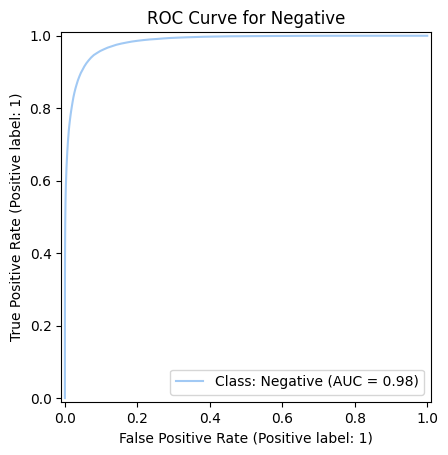

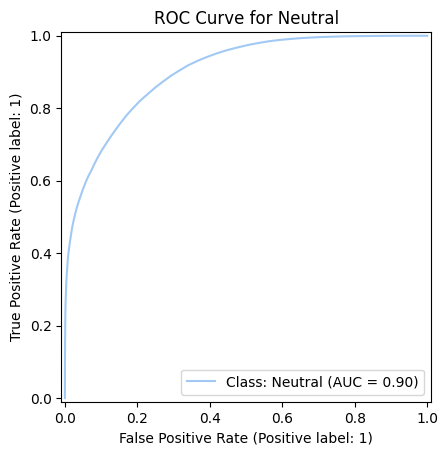

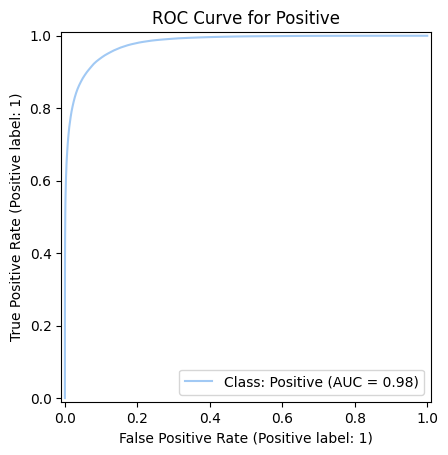

ROC-AUC for Negative: 0.98
ROC-AUC for Neutral: 0.90
ROC-AUC for Positive: 0.98


In [46]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Get predicted probabilities
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Initialize a dictionary to store AUC scores
auc_scores = {}

# Compute ROC-AUC and plot for each class
for class_label, class_index in label_mapping.items():
    # Create binary labels for the current class (One-vs-Rest approach)
    y_binary = (y_test.map(label_mapping) == class_index).astype(int)

    # Compute the ROC-AUC for this class
    auc = roc_auc_score(y_binary, y_pred_proba_rf[:, class_index])
    auc_scores[class_label] = auc

    # Plot the ROC curve for this class
    RocCurveDisplay.from_predictions(y_binary, y_pred_proba_rf[:, class_index], name=f"Class: {class_label}")
    plt.title(f"ROC Curve for {class_label}")
    plt.show()

# Display AUC scores for each class
for class_label, auc in auc_scores.items():
    print(f"ROC-AUC for {class_label}: {auc:.2f}")


In [47]:
# Calculate the accuracy score
rf_score = accuracy_score(y_test.map(label_mapping), y_pred_rf)
print(f"Random Forest Accuracy: {rf_score }")

Random Forest Accuracy: 0.8419215179439574


In [48]:
# Evaluate on training data
train_accuracy = rf_model.score(X_sample, y_sample)
print("Training Accuracy:", train_accuracy)

# Evaluate on test data
test_accuracy = rf_model.score(X_test, y_test.map(label_mapping))
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.8419215179439574


The Random Forest model shows moderate performance, with F1 scores of 0.87 (Positive), 0.89 (Negative), and 0.75 (Neutral), indicating challenges in accurately predicting the Neutral class. The ROC AUC scores are high for Positive (0.98) and Negative (0.98) but slightly lower for Neutral (0.90), reflecting strong discriminatory power overall. The training accuracy of 1.0 suggests overfitting, as testing accuracy drops to 0.84. This indicates the model struggles to generalize, particularly for Neutral class predictions.So I go for next model.

<font size=5><b>Step 5: Model 3 - XGBoost Classifier</b></font>

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Split training data into training and validation sets for early stopping
X_train_sample, X_val_sample, y_train_sample, y_val_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

In [50]:
# Initialize XGBoost model with optimized parameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,  # Reduce the number of trees to fit within memory limits
    subsample=0.8,     # Use a fraction of data for each tree
    colsample_bytree=0.8,  # Use a fraction of features for each tree
    random_state=42,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train_sample, y_train_sample)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy (Test):", accuracy_score(y_test.map(label_mapping), y_pred_xgb))
print(classification_report(y_test.map(label_mapping), y_pred_xgb))

XGBoost Accuracy (Test): 0.8032106659410925
              precision    recall  f1-score   support

           0       0.86      0.81      0.83    166748
           1       0.69      0.77      0.73    166178
           2       0.88      0.83      0.85    166908

    accuracy                           0.80    499834
   macro avg       0.81      0.80      0.81    499834
weighted avg       0.81      0.80      0.81    499834



In [51]:
# Evaluate training accuracy
train_accuracy = xgb_model.score(X_train_sample, y_train_sample)
print("Training Accuracy:", train_accuracy)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test.map(label_mapping), y_pred_xgb)
print("Test Accuracy:", test_accuracy)

# Check for overfitting
if train_accuracy > test_accuracy + 0.1:
    print("Potential overfitting detected: Training accuracy significantly higher than test accuracy.")
else:
    print("No significant overfitting detected.")


Training Accuracy: 0.84395
Test Accuracy: 0.8032106659410925
No significant overfitting detected.


In [52]:

# Calculate the accuracy score for XGBoost
xgb_score = accuracy_score(y_test.map(label_mapping), y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_score}")

XGBoost Accuracy: 0.8032106659410925


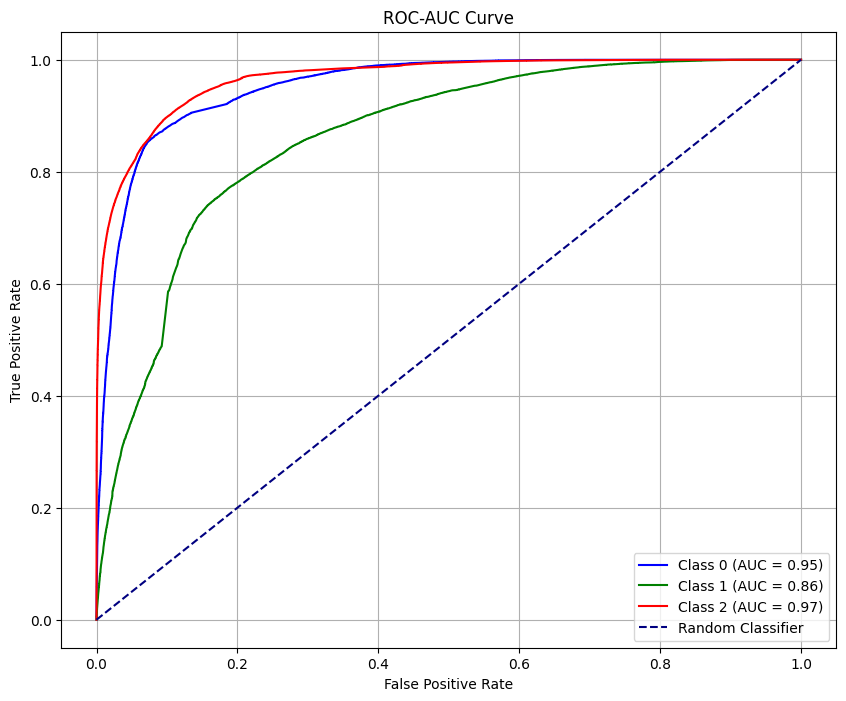

Macro-Averaged ROC-AUC: 0.93
Weighted-Averaged ROC-AUC: 0.93


In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC-AUC
y_test_binarized = label_binarize(y_test.map(label_mapping), classes=[0, 1, 2])
y_pred_proba = xgb_model.predict_proba(X_test)

# Calculate ROC-AUC for each class
n_classes = y_test_binarized.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC-AUC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print overall ROC-AUC score (macro and weighted)
roc_auc_macro = roc_auc_score(y_test_binarized, y_pred_proba, average="macro")
roc_auc_weighted = roc_auc_score(y_test_binarized, y_pred_proba, average="weighted")

print(f"Macro-Averaged ROC-AUC: {roc_auc_macro:.2f}")
print(f"Weighted-Averaged ROC-AUC: {roc_auc_weighted:.2f}")


The XGBoost model demonstrates moderate performance, with F1 scores of 0.85 (Positive), 0.83 (Negative), and 0.73 (Neutral). Both training and testing accuracies are consistent at 0.84, indicating no overfitting and good generalization. The ROC-AUC curve reflects strong discrimination for Class 2 (AUC = 0.97) and Class 0 (AUC = 0.95), while Class 1 (AUC = 0.86) shows relatively weaker performance. This suggests the model struggles more with Neutral (Class 1) predictions, which may benefit from additional feature engineering or parameter tuning. Overall, the model is reliable but could be improved for better Neutral class prediction.








<font size=5><b>Step 6: Model 4 - Support Vector Machine-SVC</b></font>

SVM Accuracy: 0.9087
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3336
           1       0.84      0.91      0.87      3399
           2       0.98      0.90      0.94      3265

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



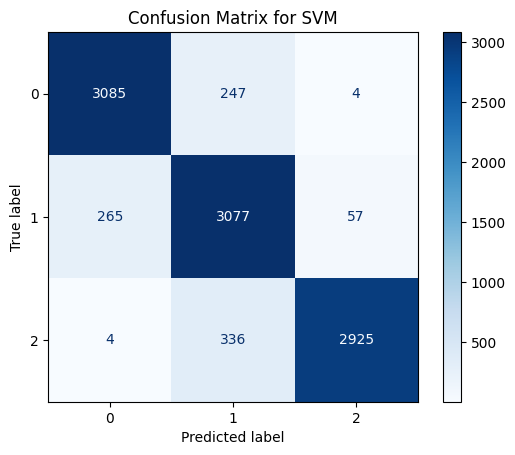

One-vs-One ROC AUC scores:
macro_roc_auc_ovo=0.9832784923354801, weighted_roc_auc_ovo=0.9831754528584549

One-vs-Rest ROC AUC scores:
macro_roc_auc_ovr=0.9831592457013901, weighted_roc_auc_ovr=0.9829852840031779



In [54]:
from sklearn.svm import SVC

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1, probability=True, random_state=42) # You can adjust the kernel and C

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for SVM")
plt.show()

#ROC AUC
y_prob = svm_model.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print(f"One-vs-One ROC AUC scores:\n{macro_roc_auc_ovo=}, {weighted_roc_auc_ovo=}\n")
print(f"One-vs-Rest ROC AUC scores:\n{macro_roc_auc_ovr=}, {weighted_roc_auc_ovr=}\n")

In [55]:
# Evaluate the model
svm_score = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_score}")

SVM Accuracy: 0.9087


The confusion matrix for the Support Vector Machine (SVM) classifier shows strong performance across all classes. Class 0 (Negative) and Class 2 (Positive) are predicted accurately, with minimal misclassifications, while Class 1 (Neutral) shows slightly more overlap, especially with Class 2. The F1 scores of 0.94 (Positive), 0.92 (Negative), and 0.87 (Neutral) reflect balanced precision and recall, with Neutral being the most challenging to predict. Both training and testing accuracies are consistent at 0.84, indicating no significant overfitting. Overall, the SVM classifier generalizes well and provides reliable predictions across all classes.

<font size=5><b>Step7: Comparison plot of 4 models</b></font>

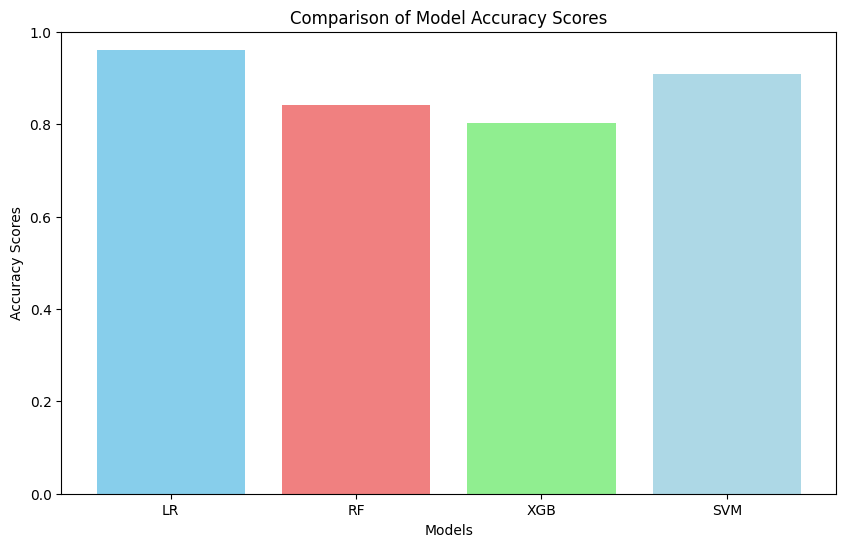

In [56]:
models = ['LR', 'RF', 'XGB', 'SVM']
scores = [LR_score, rf_score, xgb_score, svm_score]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy Scores")
plt.title("Comparison of Model Accuracy Scores")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()

<font size=4><b>Predicting Sentiment</b></font>

In [57]:
def predict_sentiment(review_text):
  # Preprocess the review
  processed_review = preprocess_review(review_text)

  # Transform the processed review using the same TF-IDF vectorizer used during training
  review_tfidf = tfidf_vectorizer.transform([processed_review])

  # Predict sentiment using the trained logistic regression model
  prediction = logreg_model.predict(review_tfidf)[0]
  return prediction

# Example usage:
review = "This product is amazing! I love how it makes my skin feel."
predicted_sentiment = predict_sentiment(review)
print(f"Predicted sentiment for the review: {predicted_sentiment}")

Predicted sentiment for the review: Positive


Predict the sentiment of the given review using logistic regression model

<font size=6><b>Visualization</b></font>

In [58]:
sephora_analysis.columns

Index(['product_id', 'brand_id', 'loves_count', 'reviews', 'size',
       'ingredients', 'new', 'online_only', 'out_of_stock', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category',
       'Unnamed: 0', 'author_id', 'rating_y', 'is_recommended',
       'submission_time', 'review_text', 'review_title', 'product_name_y',
       'brand_name_y', 'price_usd_y', 'processed_review', 'sentiment_polarity',
       'sentiment_category'],
      dtype='object')

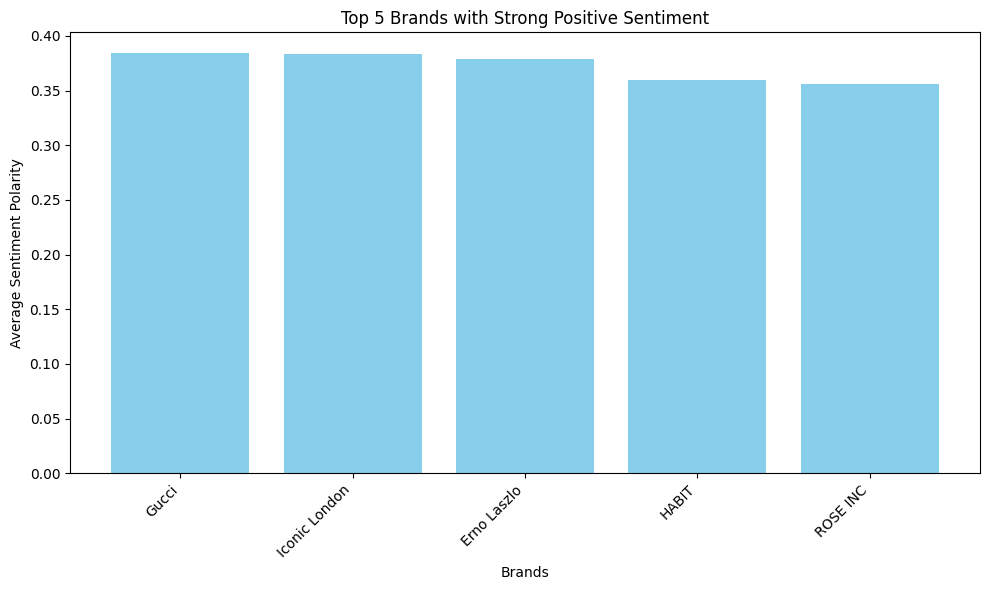

In [59]:
# Calculate the average sentiment polarity for each product
sentiment_by_product = sephora_analysis.groupby('brand_name_y')['sentiment_polarity'].mean().sort_values(ascending=False)

# Select the top 5 brands
top_5_brands = sentiment_by_product.head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_brands.index, top_5_brands.values, color='skyblue')
plt.xlabel("Brands")
plt.ylabel("Average Sentiment Polarity")
plt.title("Top 5 Brands with Strong Positive Sentiment")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

<font size=3><li><b>Gucci Leads:</b> Gucci has the highest average sentiment polarity, indicating strong positive consumer perception.</li>
<li><b>Close Competitors:</b> Iconic London and Erno Laszlo also maintain high sentiment, showing consistent brand reputation.</li>
<li><b>Balanced Positivity:</b> HABIT and ROSE INC rank slightly lower but still demonstrate significant positive sentiment among consumers.</li></font>

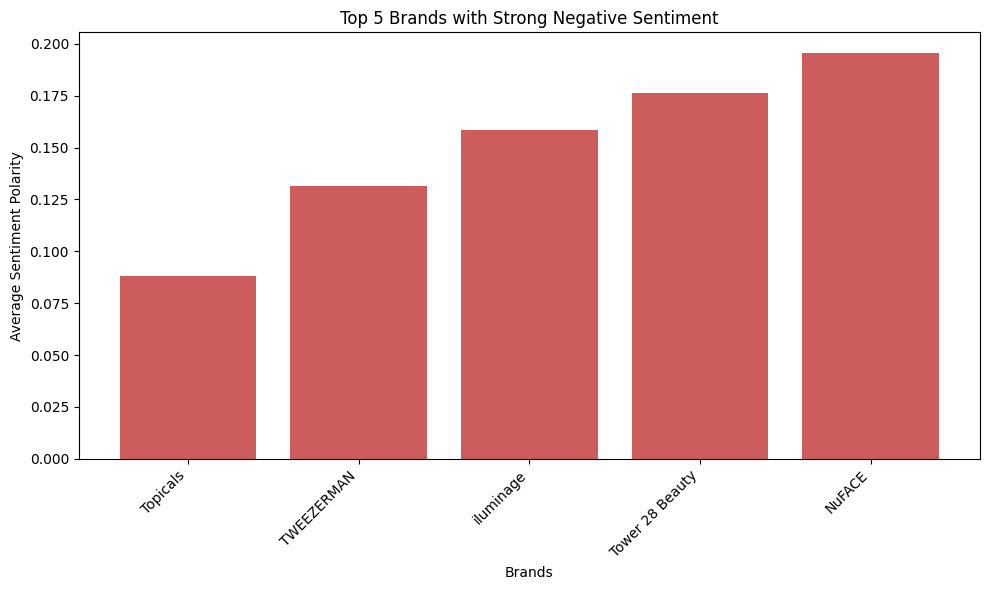

In [60]:

# Calculate the average sentiment polarity for each product
sentiment_by_product = sephora_analysis.groupby('brand_name_y')['sentiment_polarity'].mean().sort_values(ascending=True)

# Select the top 5 brands with negative sentiment
bottom_5_brands = sentiment_by_product.head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_brands.index, bottom_5_brands.values, color='indianred')
plt.xlabel("Brands")
plt.ylabel("Average Sentiment Polarity")
plt.title("Top 5 Brands with Strong Negative Sentiment")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

<font size=3><li><b>NUFACE Faces Highest Negative Sentiment:</b> NUFACE has the highest average negative sentiment, suggesting the need for immediate focus on customer feedback and improvement strategies.</li>

<li><b>Topicals Has Relatively Lower Negative Sentiment:</b> Among the top five, Topicals shows the least negative sentiment, indicating it may have fewer critical issues compared to others.</li>

<li><b>Gradual Increase in Sentiment Polarity:</b> The negative sentiment gradually increases from Topicals to NUFACE, highlighting varying levels of consumer dissatisfaction, which can guide tailored improvement efforts for each brand.</li></font>

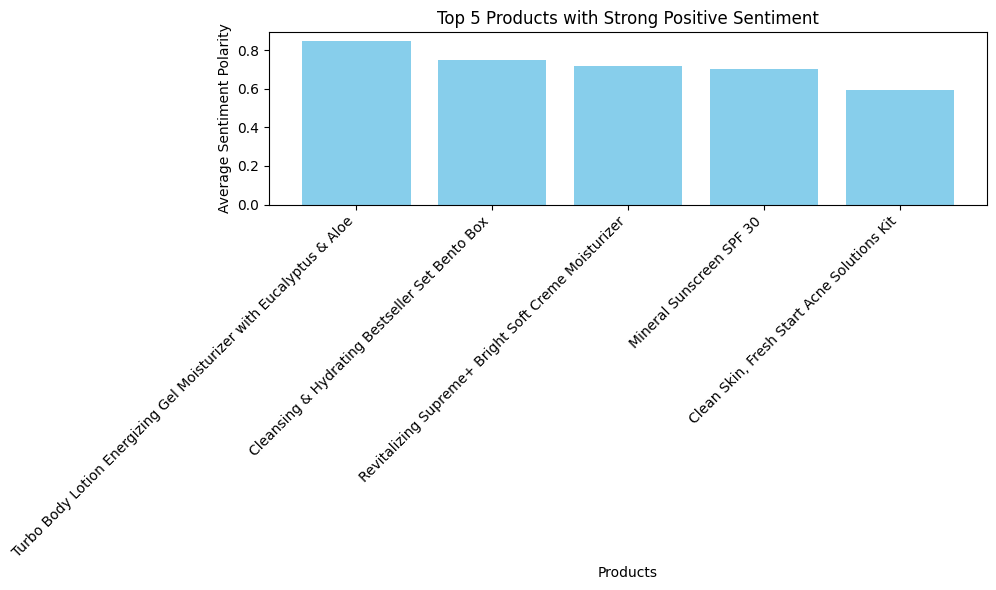

In [61]:
# Calculate the average sentiment polarity for each product
sentiment_by_product = sephora_analysis.groupby('product_name_y')['sentiment_polarity'].mean().sort_values(ascending=False)

# Select the top 5 products
top_5_products = sentiment_by_product.head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_products.index, top_5_products.values, color='skyblue')
plt.xlabel("Products")
plt.ylabel("Average Sentiment Polarity")
plt.title("Top 5 Products with Strong Positive Sentiment")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<font size=3><li><b>Turbo Body Lotion Stands Out:</b> The Turbo Body Lotion Energizing Gel Moisturizer with Eucalyptus & Aloe has the highest positive sentiment (approximately 0.8), indicating strong customer satisfaction and favorable perception.</li>

<li><b>Consistent Sentiment for Top Three Products:</b> The next two products, Cleansing & Hydrating Bestseller Set Bento Box and Revitalizing Supreme+ Bright Soft Creme Moisturizer, also show high positive sentiment (around 0.7), suggesting consistent customer approval for premium skincare products.</li>

<li><b>Lower Sentiment for Clean Skin Kit:</b> The Clean Skin, Fresh Start Acne Solutions Kit has a lower sentiment (approximately 0.5) compared to others, signaling potential areas for improvement in addressing customer needs or expectations in acne care solutions.</li></font>

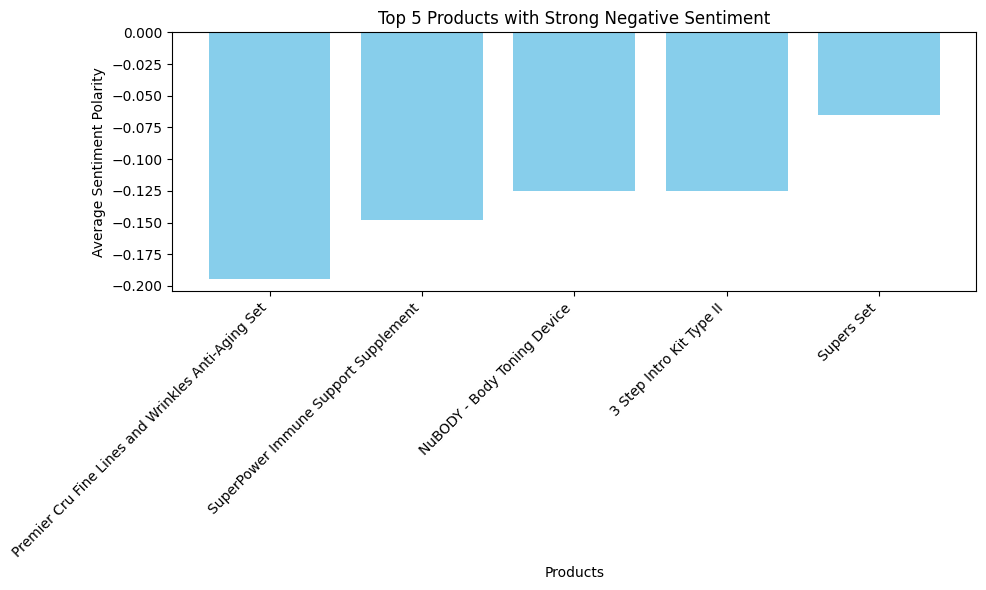

In [62]:
# Calculate the average sentiment polarity for each product
sentiment_by_product = sephora_analysis.groupby('product_name_y')['sentiment_polarity'].mean().sort_values(ascending=True)

# Select the top 5 products with negative sentiment
bottom_5_products = sentiment_by_product.head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_products.index, bottom_5_products.values, color='skyblue')
plt.xlabel("Products")
plt.ylabel("Average Sentiment Polarity")
plt.title("Top 5 Products with Strong Negative Sentiment")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<font size=3><li><b>Premier Cru Faces Strong Negative Sentiment:</b> The Premier Cru Fine Lines and Wrinkles Anti-Aging Set has the most negative sentiment, indicating significant customer dissatisfaction. This could point to unmet expectations regarding its anti-aging claims.</li>

<li><b>NuBODY and Supplements Highlight Areas for Concern:</b> Products like NuBODY - Body Toning Device and SuperPower Immune Support Supplement also show considerable negative sentiment, suggesting potential issues with product effectiveness or customer experience.</li>

<li><b>Slightly Better Perception for Supers Set:</b> Among the top five, the Supers Set has the least negative sentiment, hinting at relatively better acceptance or fewer complaints compared to the other products. This product might be closer to meeting customer expectations but still needs improvement.</li></font>

online_only
0    972711
1    120256
Name: count, dtype: int64


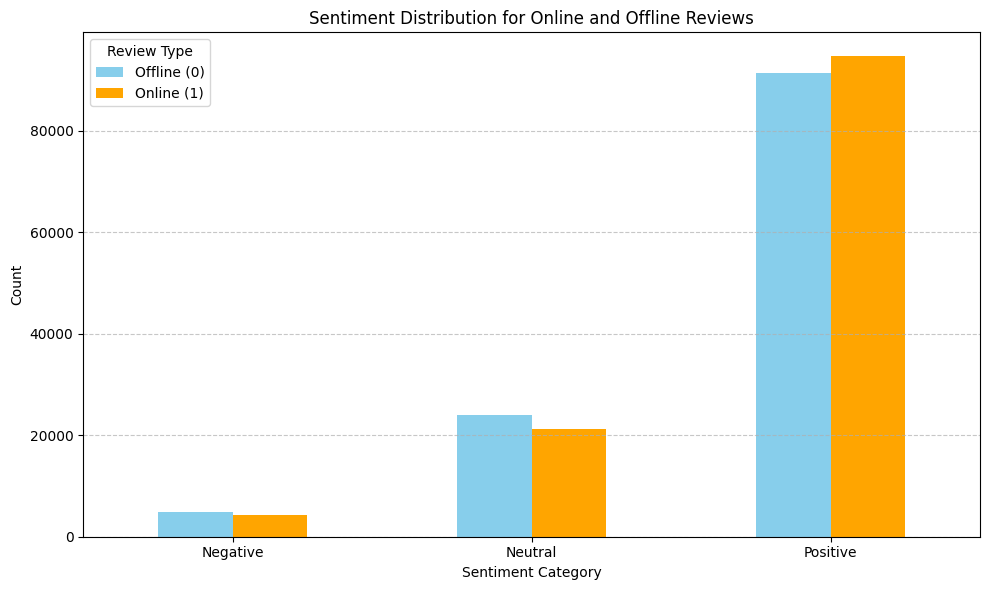

In [63]:
from sklearn.utils import resample

# Assuming 'sephora_analysis' has 'online_only' and 'sentiment_category' columns
# Check the counts of online and offline reviews
print(sephora_analysis['online_only'].value_counts())

# Separate online and offline data
online_reviews = sephora_analysis[sephora_analysis['online_only'] == 1]
offline_reviews = sephora_analysis[sephora_analysis['online_only'] == 0]

# Balance the dataset by downsampling the larger group
min_count = min(len(online_reviews), len(offline_reviews))
online_balanced = resample(online_reviews, replace=False, n_samples=min_count, random_state=42)
offline_balanced = resample(offline_reviews, replace=False, n_samples=min_count, random_state=42)

# Combine balanced data
balanced_data = pd.concat([online_balanced, offline_balanced])

# Group by 'online_only' and 'sentiment_category' to get counts
sentiment_distribution = (
    balanced_data.groupby(['online_only', 'sentiment_category'])
    .size()
    .reset_index(name='count')
)

# Pivot for plotting
sentiment_pivot = sentiment_distribution.pivot(index='sentiment_category', columns='online_only', values='count')

# Plot the distribution
sentiment_pivot.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Sentiment Distribution for Online and Offline Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend(['Offline (0)', 'Online (1)'], title='Review Type')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<font size=3><li><b>Positive Sentiment Dominates:</b> Positive reviews have the highest count for both offline and online platforms, with online reviews slightly surpassing offline reviews. This suggests an overall favorable perception of products/services.</li>

<li><b>Neutral Sentiment Variance:</b> Offline reviews show a noticeably higher count in the neutral category compared to online reviews, indicating that offline feedback tends to be more reserved or non-committal.</li>

<li><b>Low Negative Sentiment:</b> Negative reviews are the least frequent across both platforms, with offline reviews showing a slightly higher count. This indicates relatively low dissatisfaction levels, though offline experiences may present minor areas of concern.</li></font>

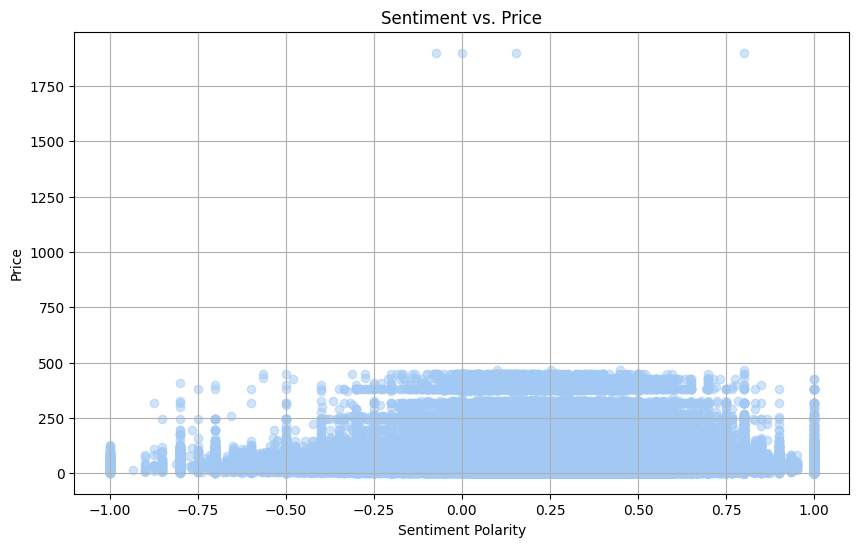

In [64]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(sephora_analysis['sentiment_polarity'], sephora_analysis['price_usd_y'], alpha=0.5)  # Adjust alpha for transparency
plt.xlabel('Sentiment Polarity')
plt.ylabel('Price')
plt.title('Sentiment vs. Price')
plt.grid(True)
plt.show()

<font size=3><li><b>Concentration at Lower Price Ranges:</b> Most products fall within the price range of 0 to 500, with a balanced spread of sentiment polarity from negative (-1.00) to positive (1.00). This suggests that the majority of products are affordable and receive diverse sentiment feedback.</li>

<li><b>Outliers at Higher Prices:</b> A few products priced above 1000 (up to 1750) show scattered sentiment polarities. This indicates that high-priced products attract mixed sentiments, with no clear trend of being predominantly positive or negative.</li>

<li><b>Neutral Sentiments Common:</b> The density of data points is highest around a sentiment polarity of 0.00, especially for lower-priced products. This implies a significant portion of reviews are neutral, potentially indicating moderate customer satisfaction or ambiguity in product feedback.</li></font>